In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
df =pd.read_csv('PEP1.csv')

#shape of the dataset
df.shape

(1460, 81)

In [5]:
pd.set_option('display.max_rows',None)
isnull_columns = df.isna().sum()
isnull_columns = isnull_columns[isnull_columns > 0]

#isnull_columns
isnull_columns

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
isnull_columns_remove = isnull_columns[isnull_columns > 1100]
lst = isnull_columns_remove.index[0:].tolist()
print(lst)

# DROP Columns that have more than 1100 null columns
df = df.drop(columns=lst,axis = 1)
isnull_columns = df.isna().sum()
isnull_columns = isnull_columns[isnull_columns > 0]
isnull_columns


['Alley', 'PoolQC', 'Fence', 'MiscFeature']


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [7]:
df.shape

(1460, 77)

In [8]:
# Split dataframe into two seperate dataframes with numerical values and categoty values
dfNum = df.select_dtypes(exclude='object') # Numeric Columns
dfCat = df.select_dtypes(include='object') # Category Columns

# Display the first few rows of each new dataset
print("Numerical Dataset:")
print(dfNum.head())

print("\nCategorical Dataset:")
print(dfCat.head())

Numerical Dataset:
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  

In [9]:
dfCat['Id'] = df['Id'] # Add Id column to Category columns for merge later
dfCat['SalePrice'] = df['SalePrice'] #Add SalesPrice to be able to correlate columns to prediction variable

first_column = dfCat.pop('Id')
  
# insert column using insert(position,column_name)
dfCat.insert(0, 'Id', first_column)
dfCat.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [10]:
dfNum.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot: >

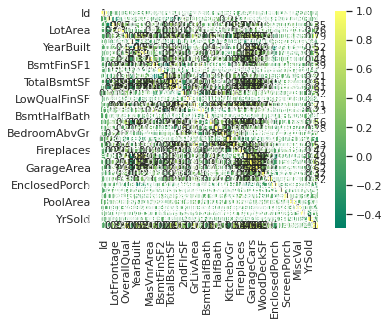

In [11]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(data=dfNum.corr(), square=True, annot=True, fmt='.2g',  cmap="summer")

In [12]:
dfNumHigh = dfNum.loc[:, dfNum.corr().abs()['SalePrice'] > 0.3]

# ADD Id Column Back to the DataFrame for merging later
dfNumHigh['Id'] = dfNum['Id']
# shift Id column to first position
first_column = dfNumHigh.pop('Id')
  
# insert column using insert(position,column_name,
dfNumHigh.insert(0, 'Id', first_column)

dfNumHigh.head()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,2,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,3,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,4,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,5,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


<AxesSubplot: >

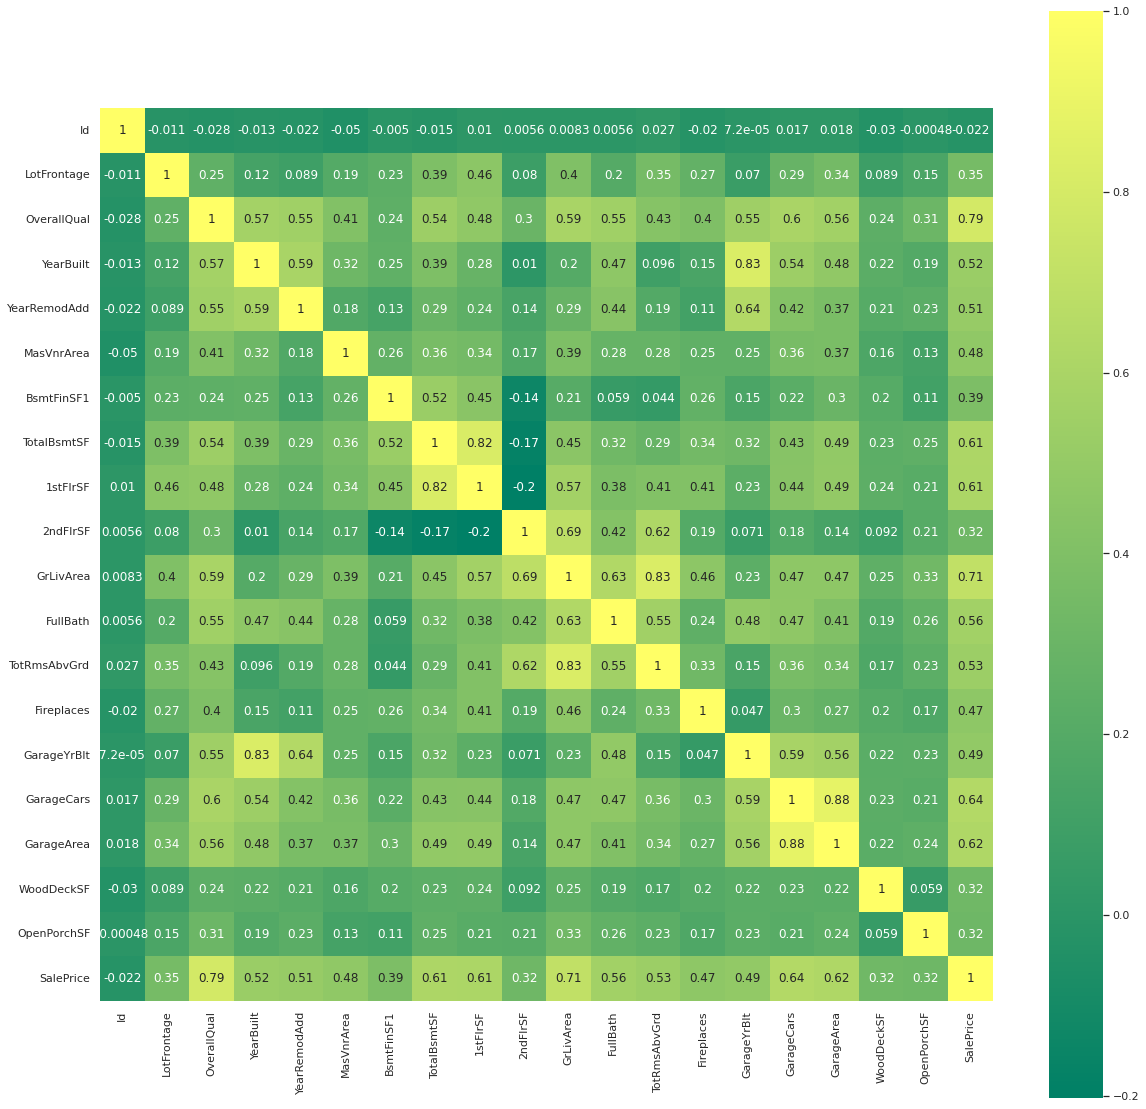

In [13]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data=dfNumHigh.corr(), square=True, annot=True, fmt='.2g',  cmap="summer")

In [14]:
dfNum = dfNumHigh

In [17]:
# What columns have nulls that we need to treat
null_columns = dfNum.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [18]:
# function to replace null vales with mean as type float
def replaceNan(lst, df):
    for i in lst:
        print('UPDATING: ' + str(i))
        df[i].fillna(value=df[i].mean().astype('float'), inplace=True)
    return df

dfNum = replaceNan(lst,dfNum)
dfNum.head()

UPDATING: Alley


KeyError: 'Alley'

Working on column: Id
Working on column: LotFrontage
Working on column: OverallQual
Working on column: YearBuilt
Working on column: YearRemodAdd
Working on column: MasVnrArea
Working on column: BsmtFinSF1
Working on column: TotalBsmtSF
Working on column: 1stFlrSF
Working on column: 2ndFlrSF
Working on column: GrLivArea
Working on column: FullBath
Working on column: TotRmsAbvGrd
Working on column: Fireplaces
Working on column: GarageYrBlt
Working on column: GarageCars
Working on column: GarageArea
Working on column: WoodDeckSF
Working on column: OpenPorchSF
Working on column: SalePrice


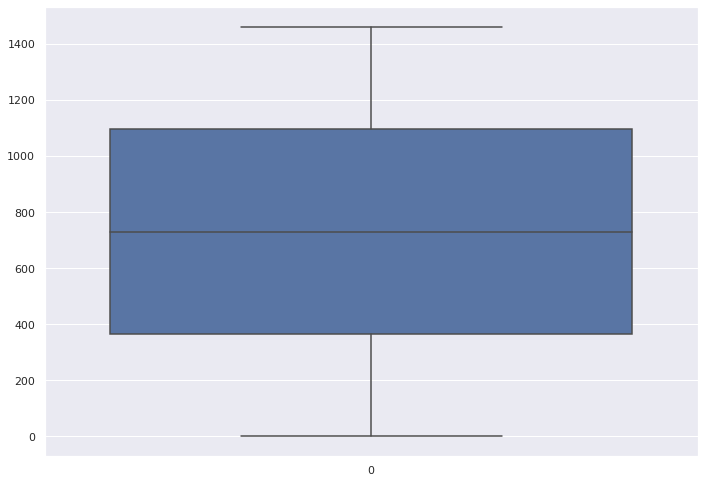

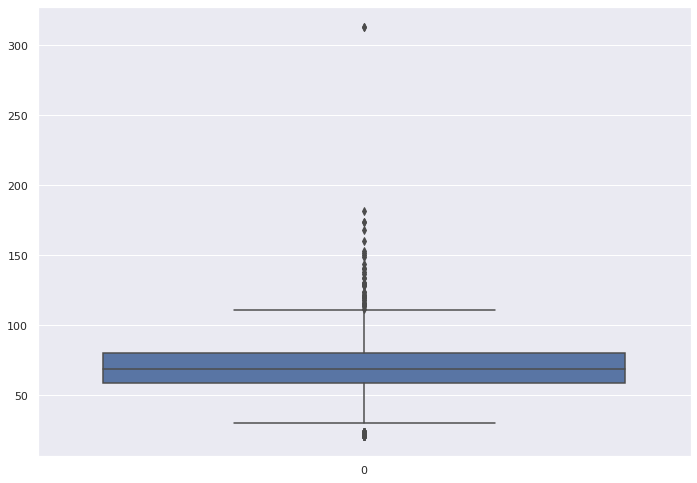

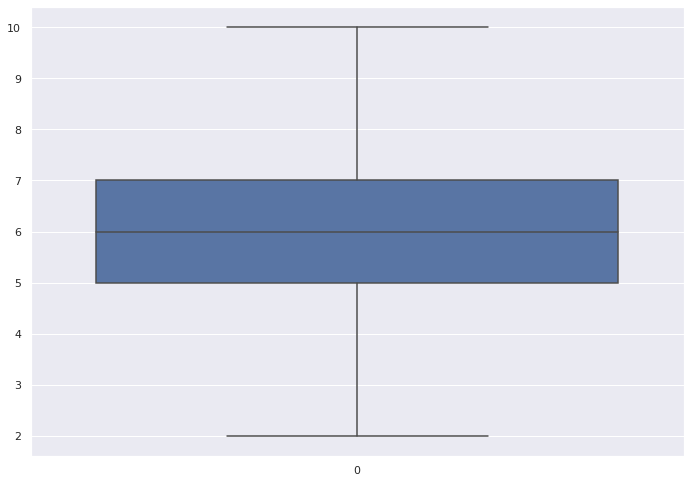

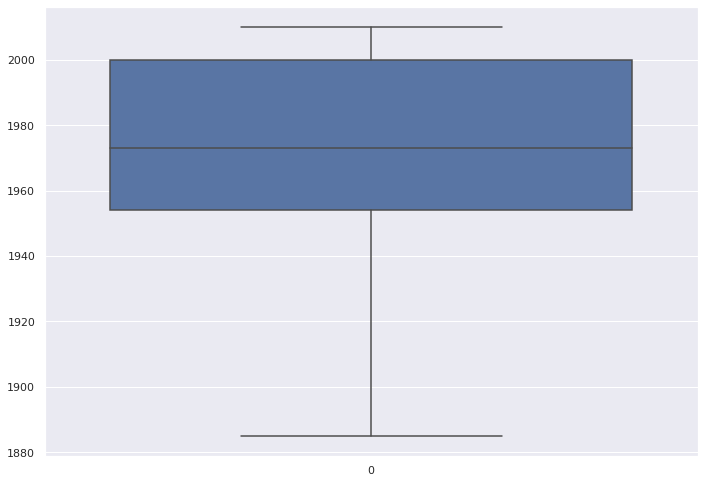

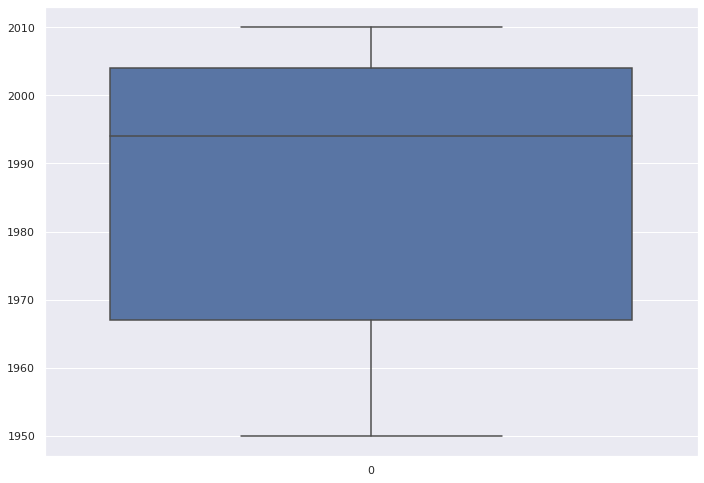

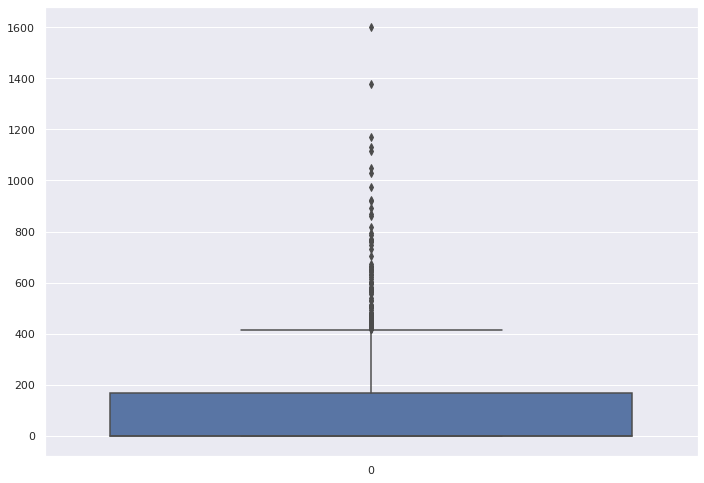

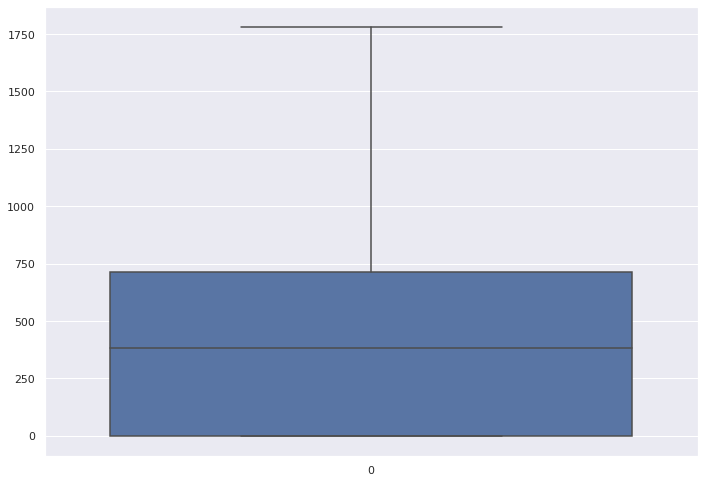

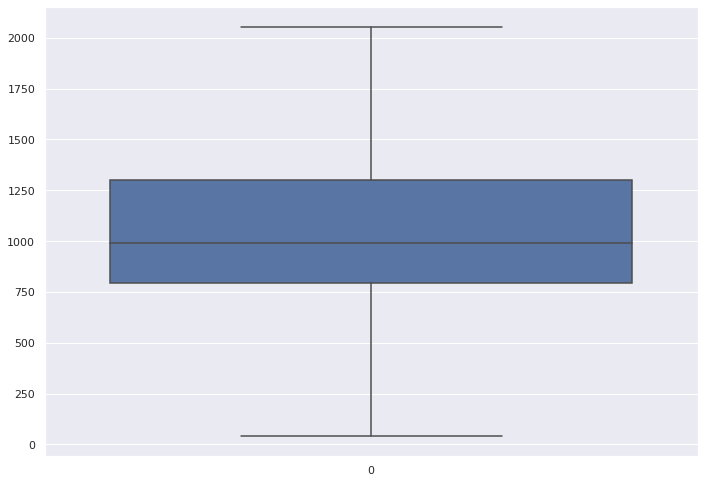

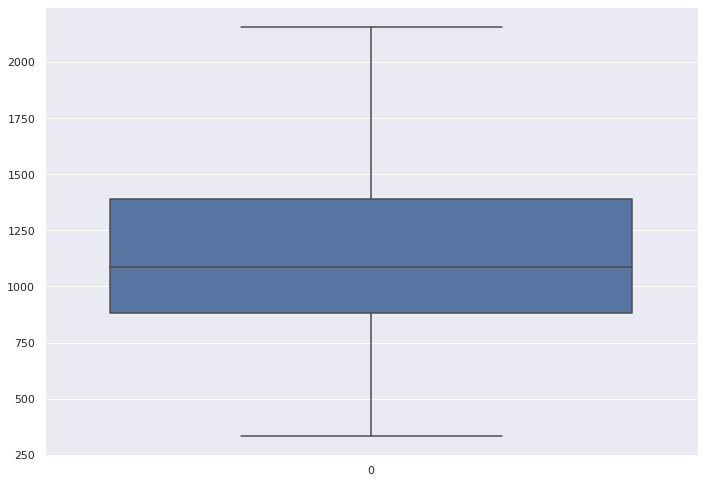

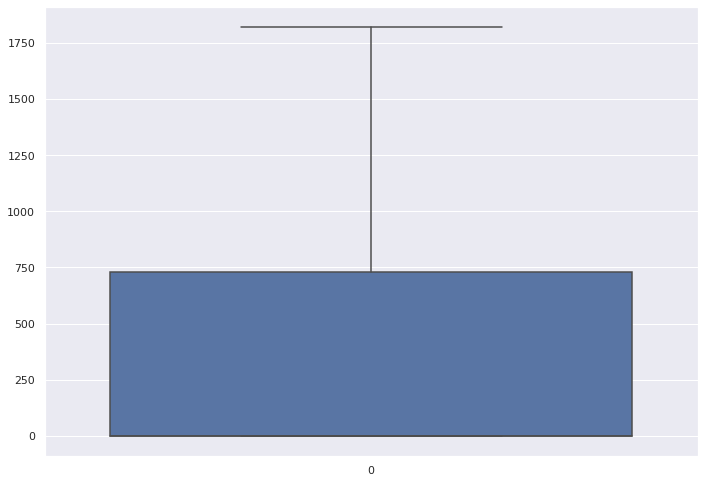

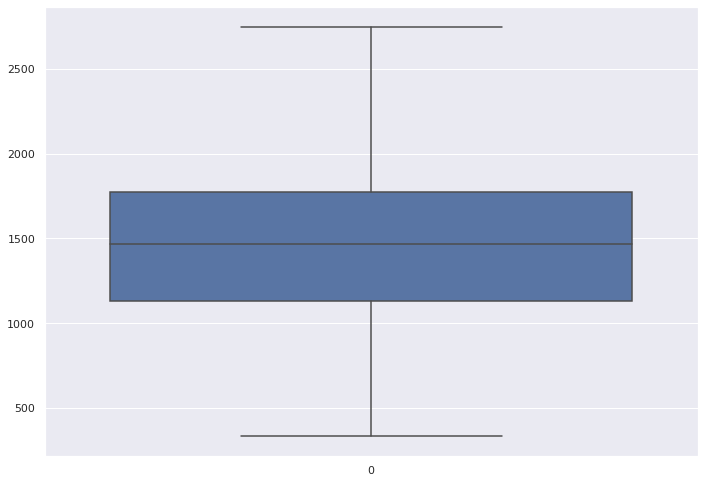

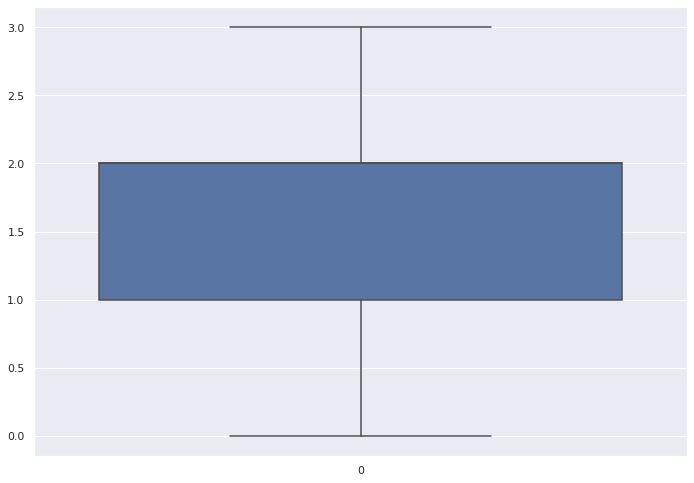

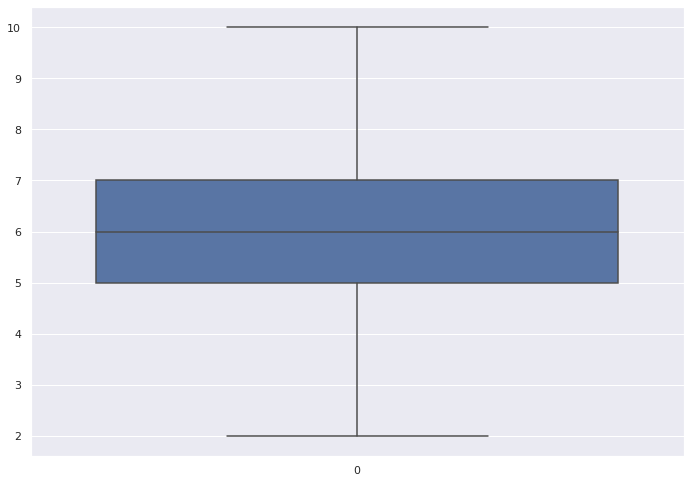

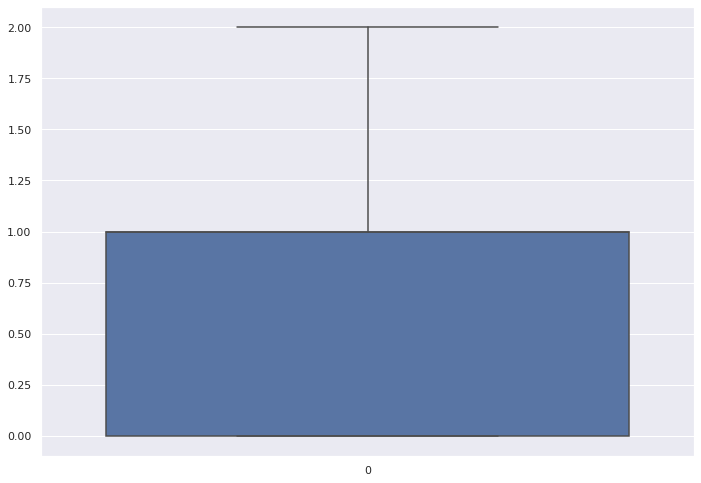

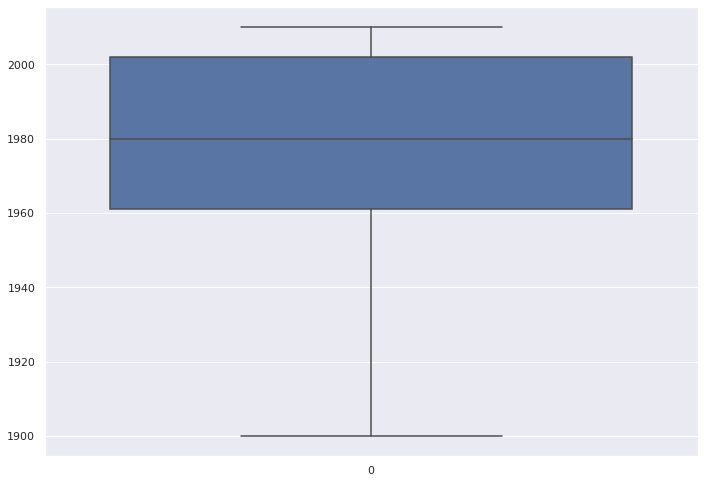

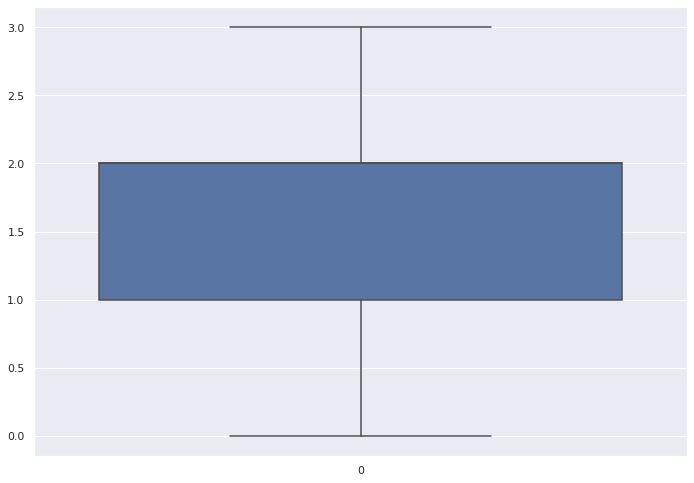

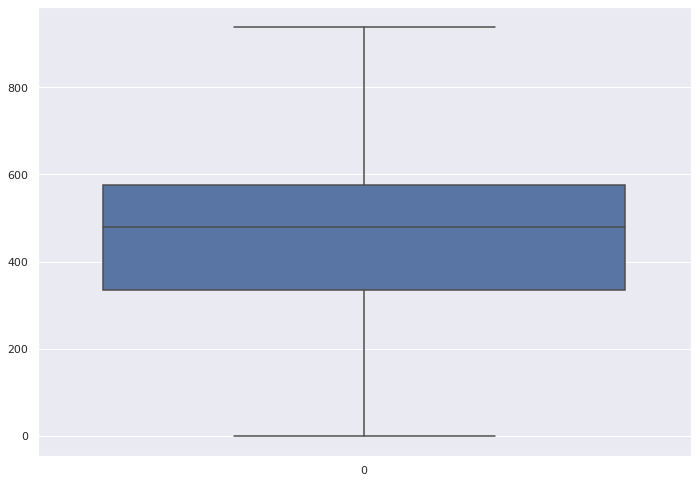

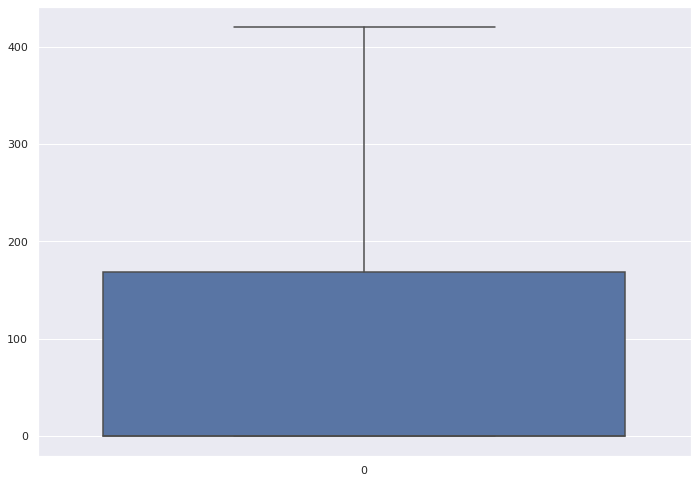

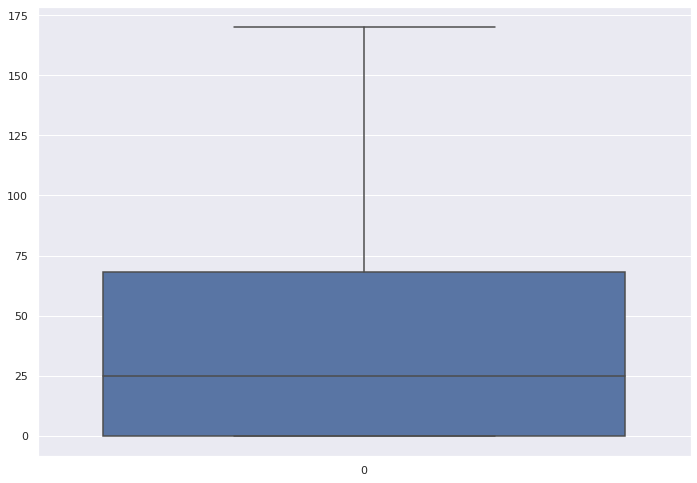

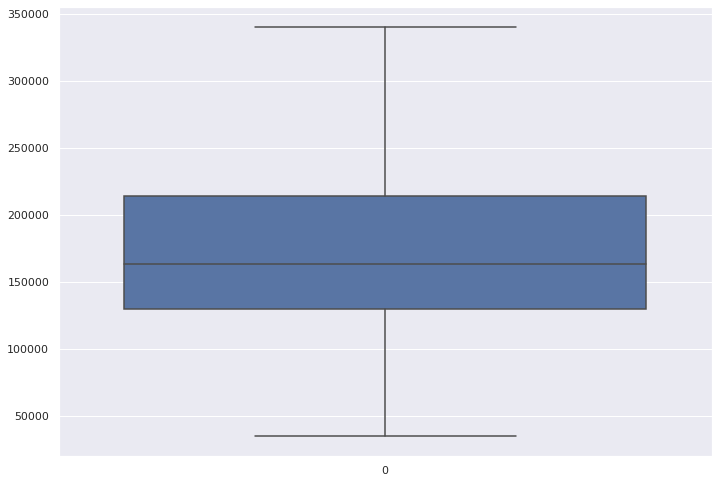

In [19]:
#view the outliner
def boxplotloop(df, columns):
    for col in columns:
        if df[col].dtype != object:
            sns.set(rc={'figure.figsize':(11.7,8.27)})
            sns.boxplot(df[col])
            plt.show()

#clean up the outliner            
def cleanup_outliers(df,columns):
    # df = dataframe
    # column takes a list of numerical columns
    
    for col in columns:
        print('Working on column: {}'.format(col))
        if (df[col].dtype != object) :
            q1,q3 = np.percentile(df[col], [25,75])
            iqr = q3-q1
            minv = q1-(1.5*iqr)  
            maxv = q3+(1.5*iqr)  
            med  = df[col].median()
            #data[col] = data[col].apply(lambda x: maxv if x>maxv else minv if x<minv else x)
            df[col] = np.where(df[col]>maxv , maxv, df[col]).astype(df[col].dtype)
            df[col] = np.where(df[col]<minv , minv, df[col]).astype(df[col].dtype)
        
    return df

df2Num = cleanup_outliers(dfNum, dfNum.columns)

#box-plot the new outliner
boxplotloop(df2Num, df2Num.describe().columns)

<AxesSubplot: >

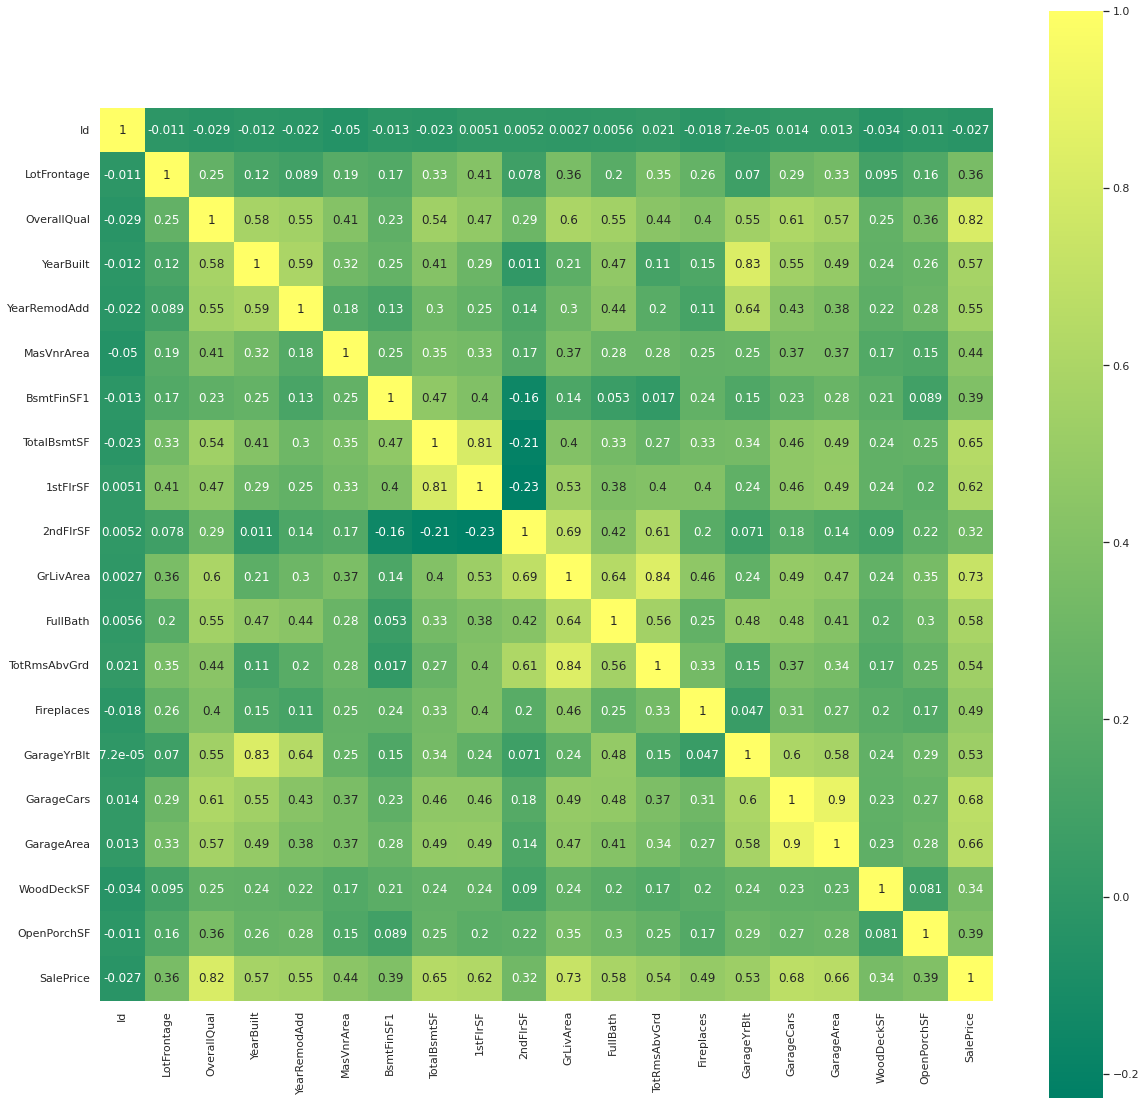

In [20]:
sns.set(rc={'figure.figsize':(20,20)})
color = plt.get_cmap('summer')   # default color
color.set_bad('lightblue')
sns.heatmap(data=df2Num.corr(), square=True, annot=True, fmt='.2g',  cmap= color)

In [21]:
skewValue = df2Num.skew(axis=0, numeric_only=True)
print(skewValue)
#sns.pairplot(df2Num)

Id              0.000000
LotFrontage     2.163569
OverallQual     0.249513
YearBuilt      -0.594020
YearRemodAdd   -0.503562
MasVnrArea      2.669084
BsmtFinSF1      0.739746
TotalBsmtSF     0.237240
1stFlrSF        0.664066
2ndFlrSF        0.800109
GrLivArea       0.593212
FullBath        0.036562
TotRmsAbvGrd    0.366919
Fireplaces      0.550521
GarageYrBlt    -0.649415
GarageCars     -0.418495
GarageArea     -0.069907
WoodDeckSF      1.083673
OpenPorchSF     1.136301
SalePrice       0.802784
dtype: float64


In [23]:
dfCat.head()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
# What columns have nulls that we need to treat
null_columns = dfCat.isna().sum()
null_columns = null_columns[null_columns > 0]

null_columns

#Replace Nulls with the mode of the column
df_clean = dfCat.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [26]:
dfCat = df_clean.copy()
# Should now see no null vales - SUCCESS
null_columns = dfCat.isna().sum()
null_columns = null_columns[null_columns > 0]

null_columns

Series([], dtype: int64)

In [27]:
dfCat.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


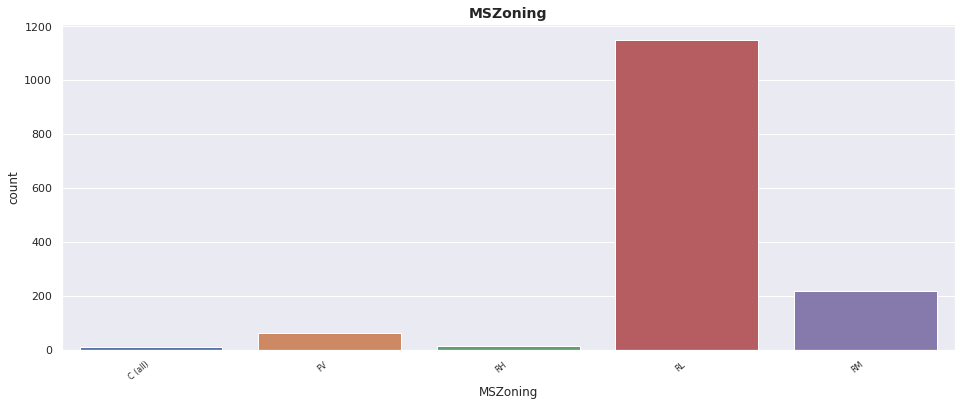

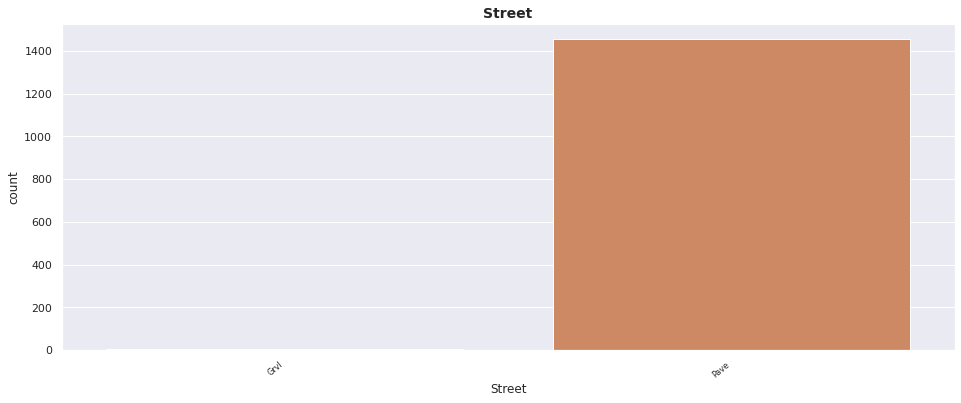

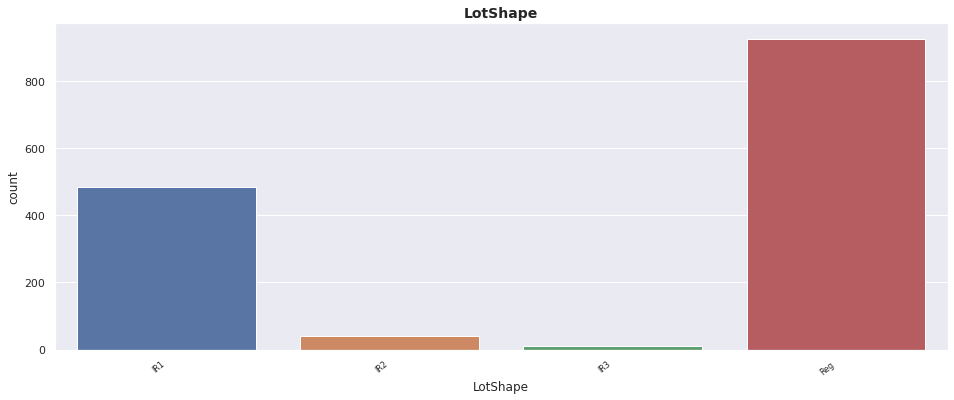

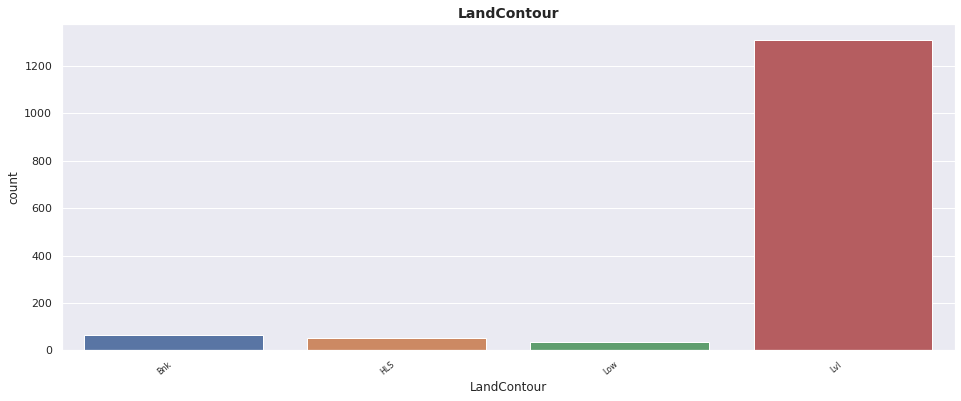

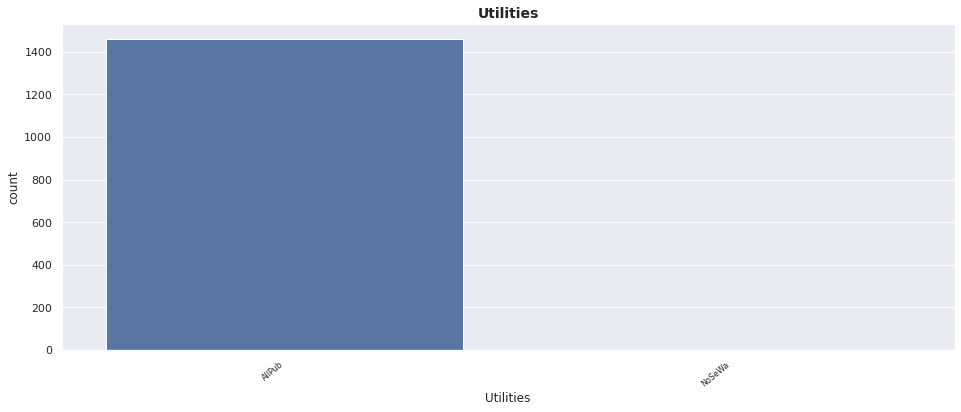

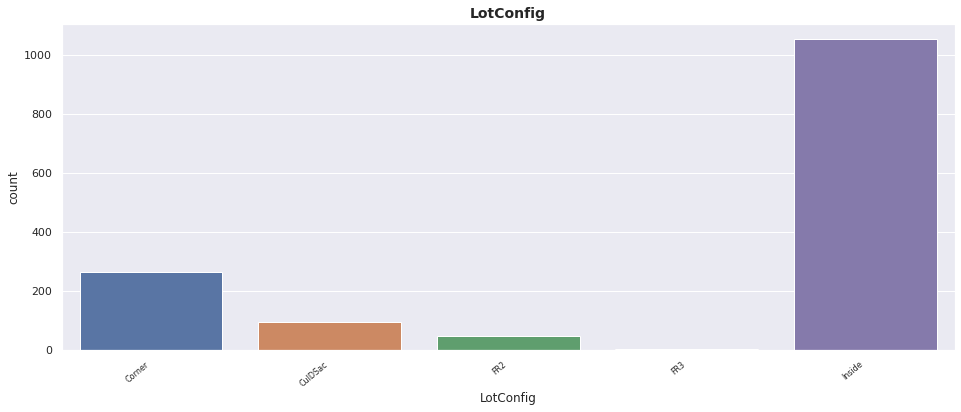

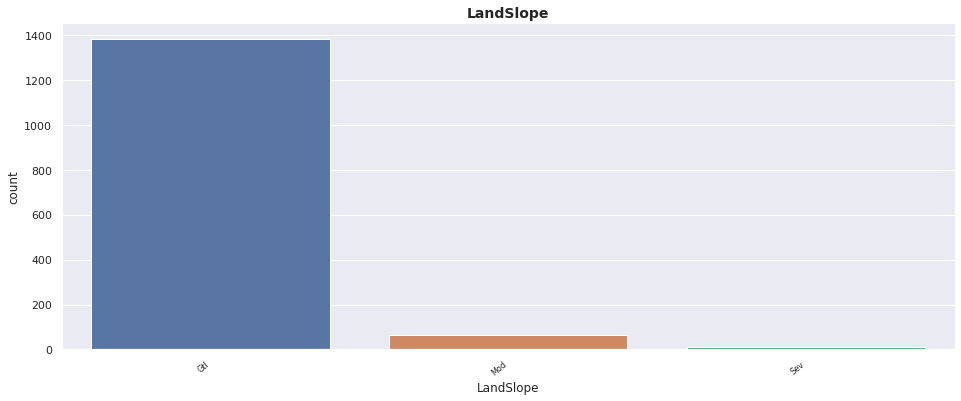

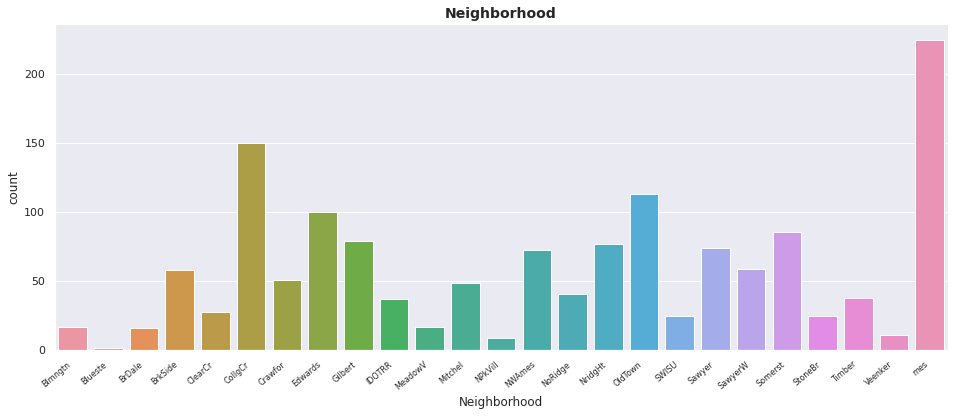

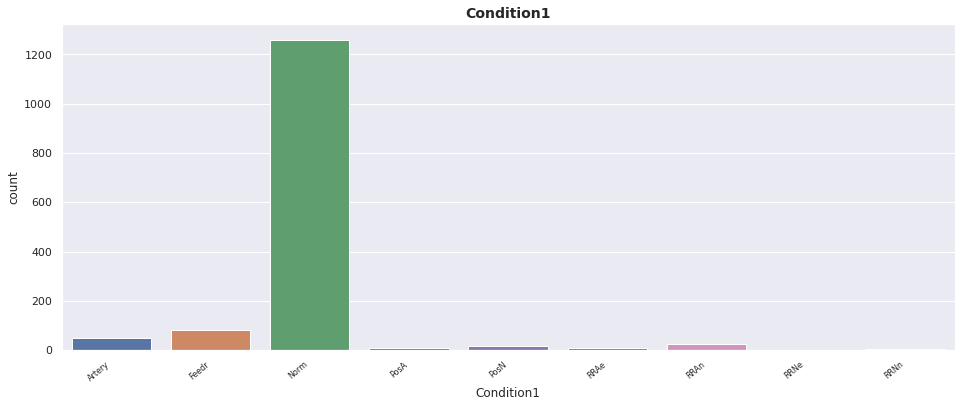

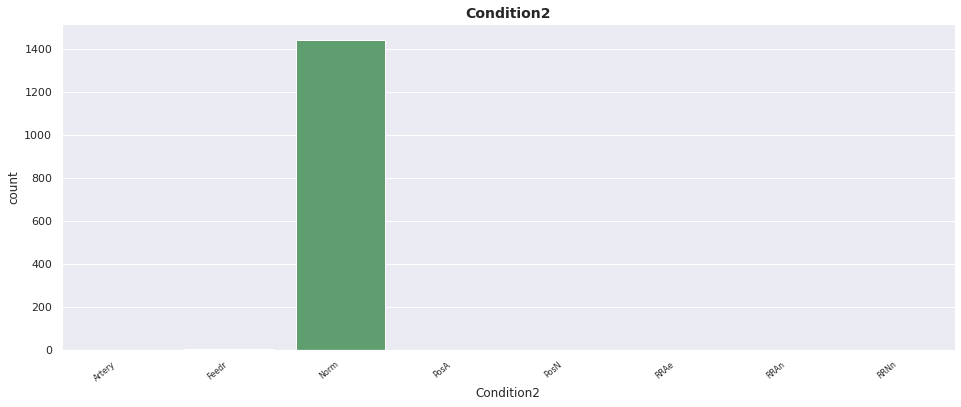

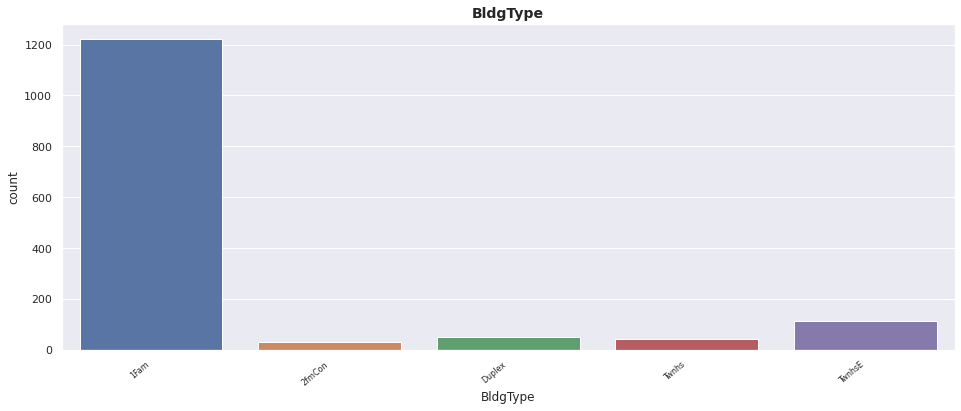

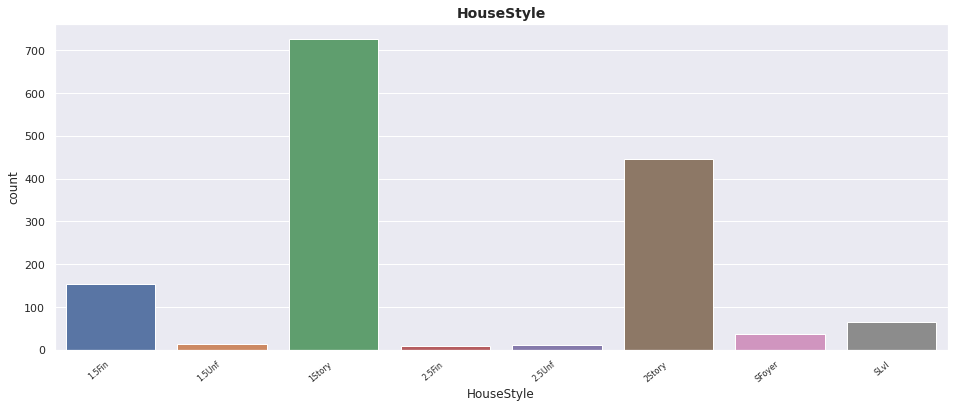

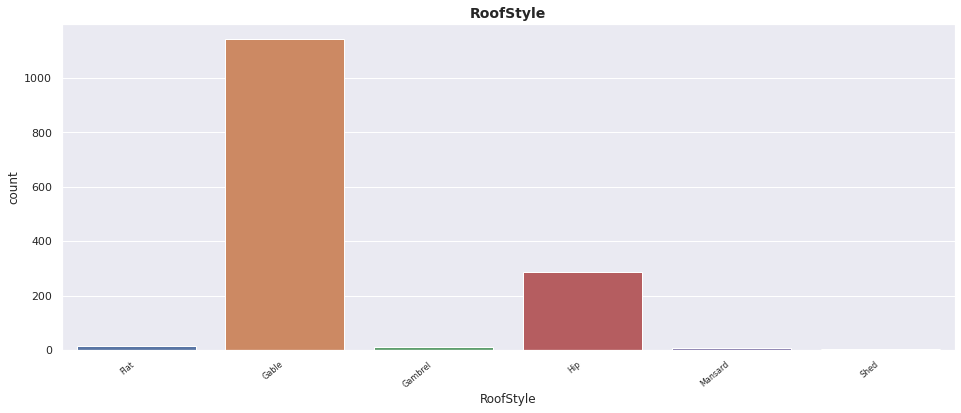

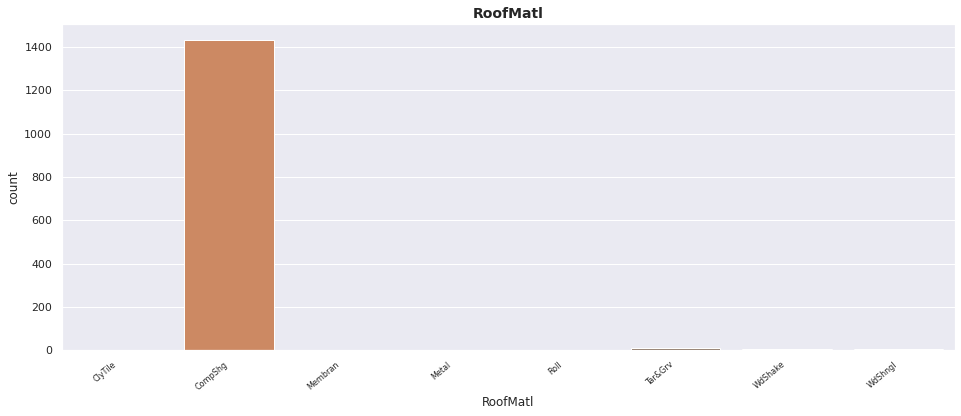

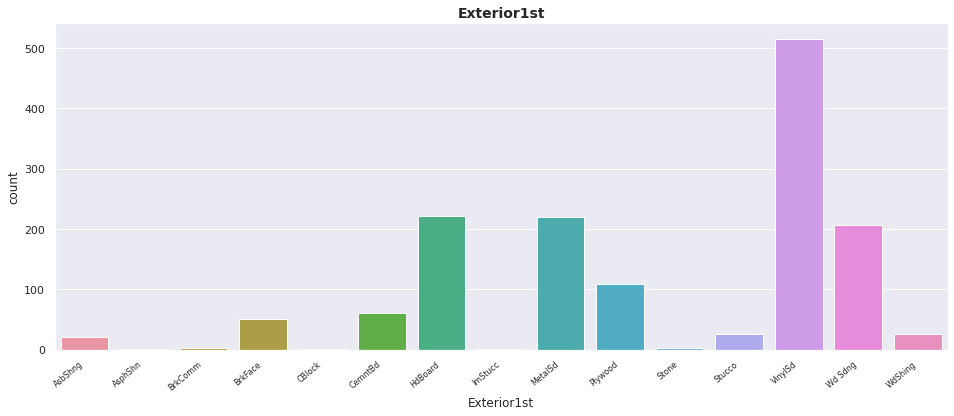

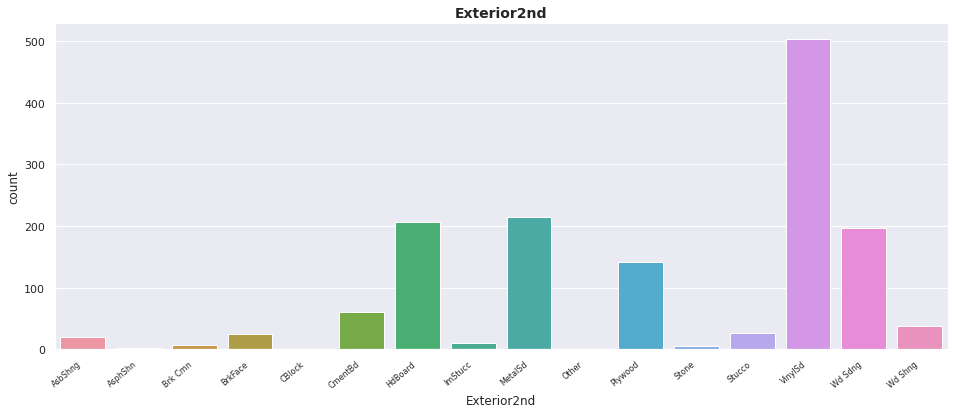

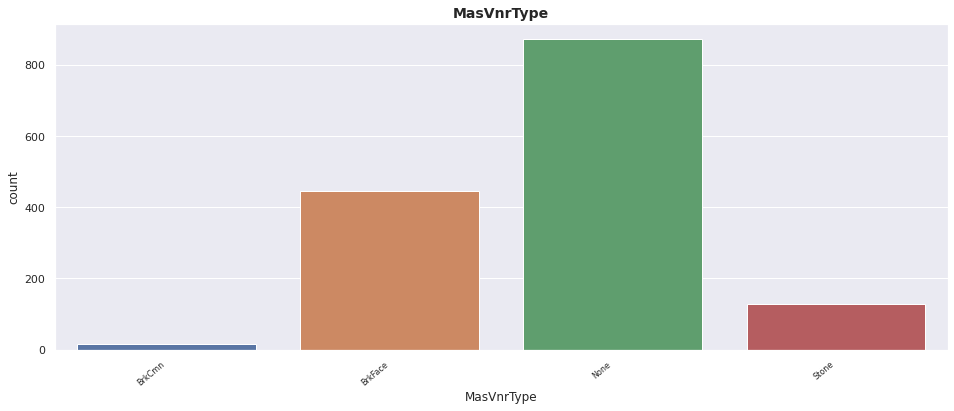

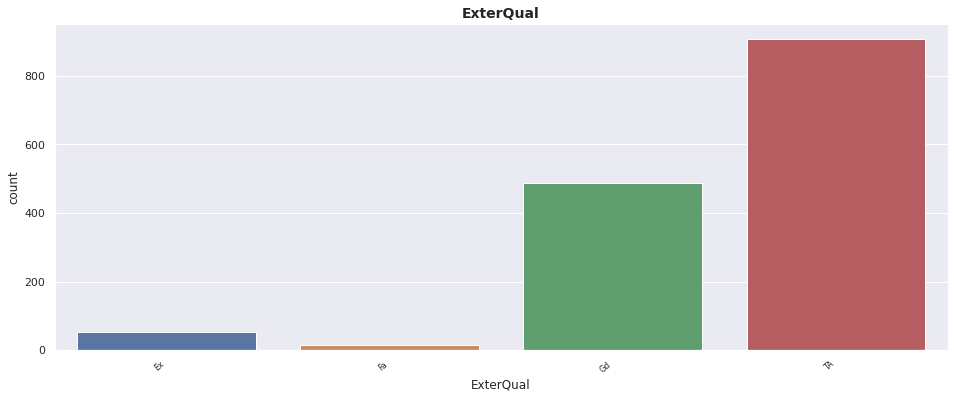

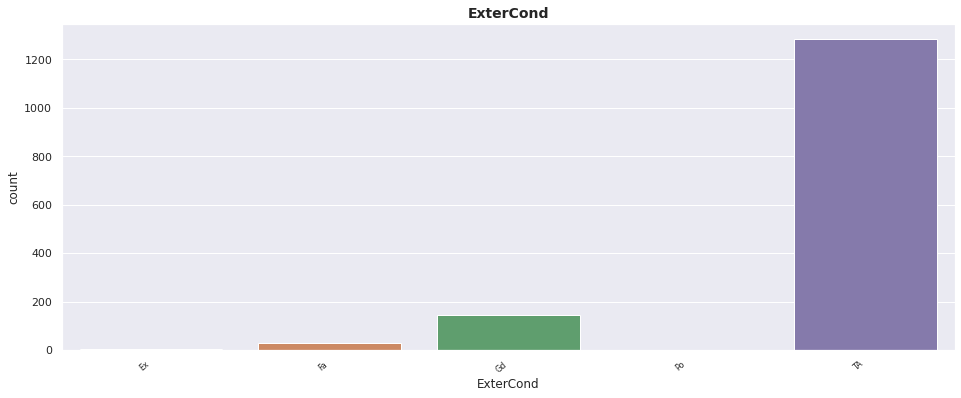

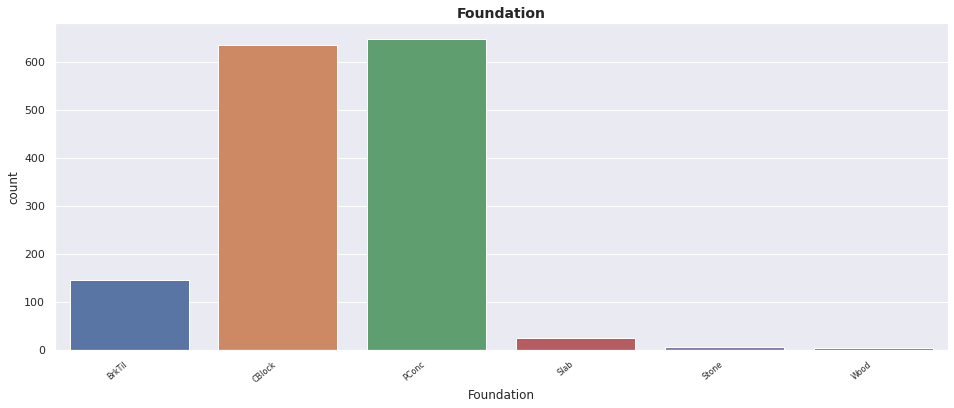

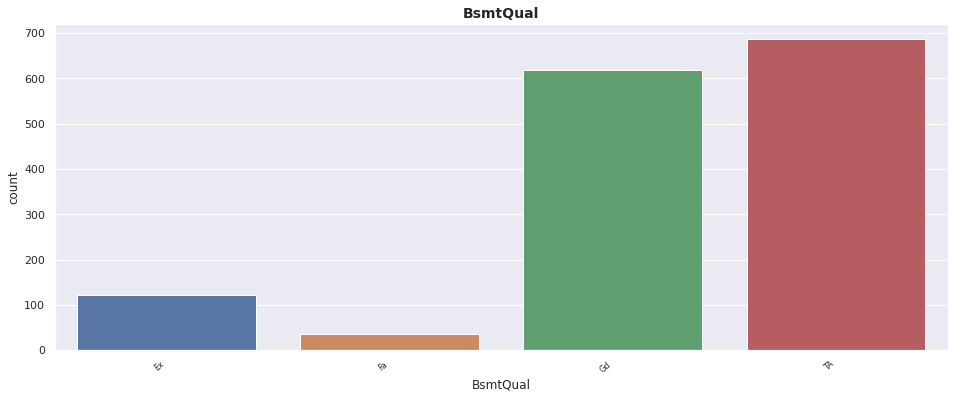

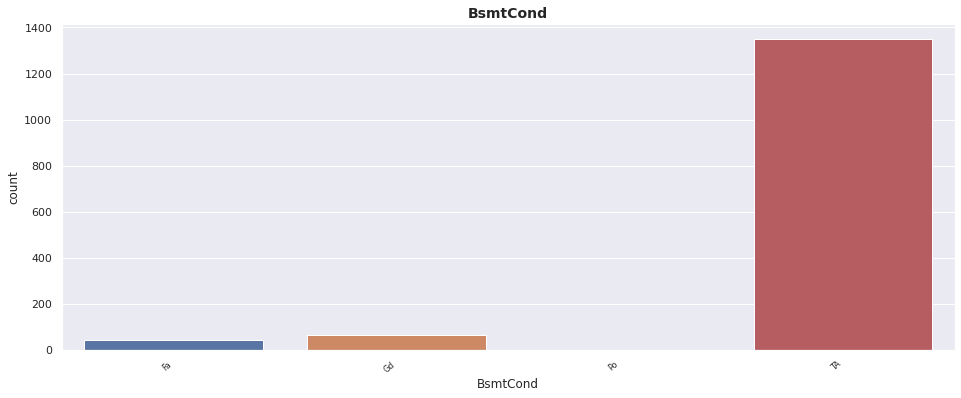

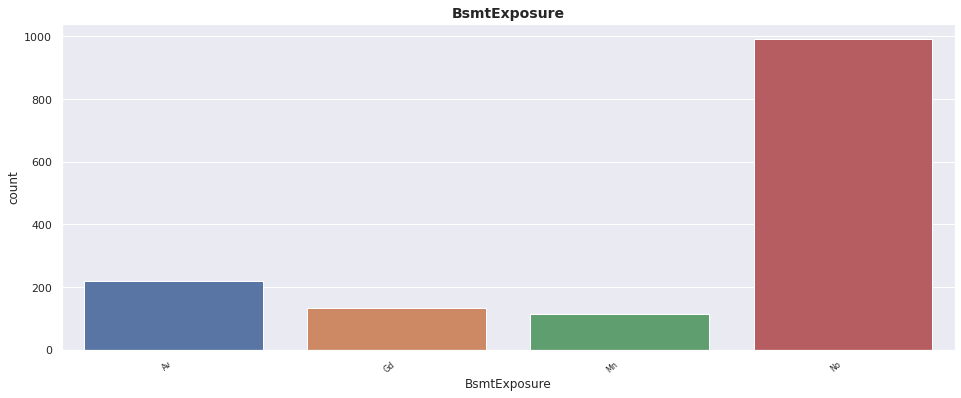

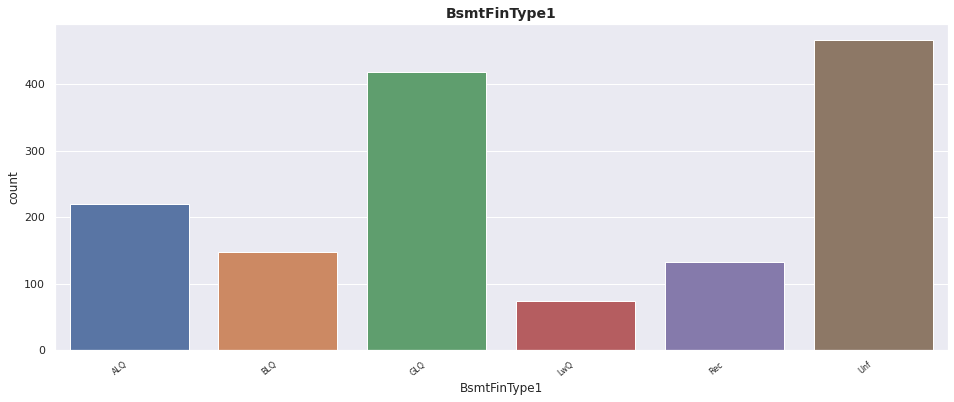

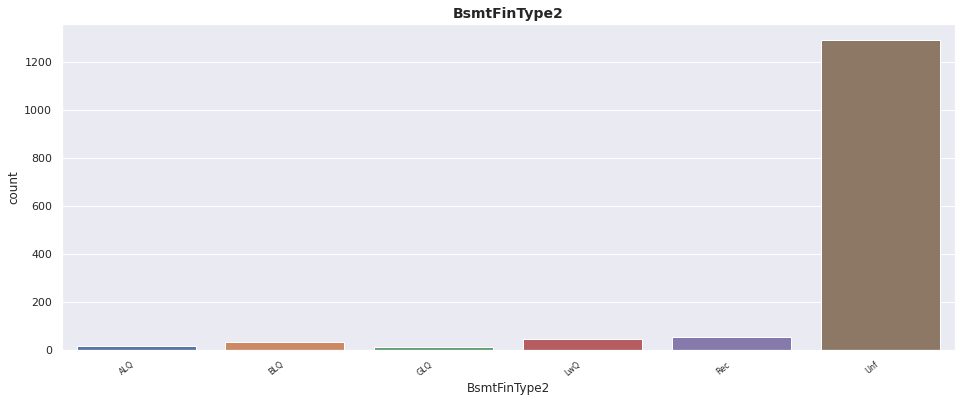

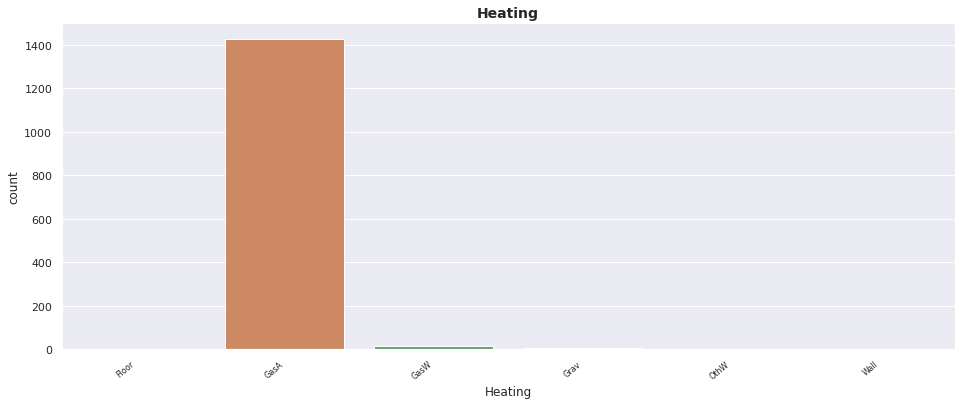

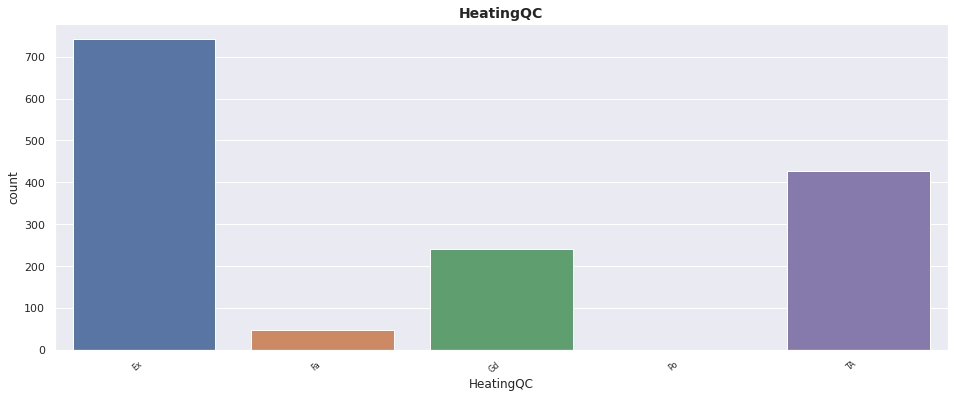

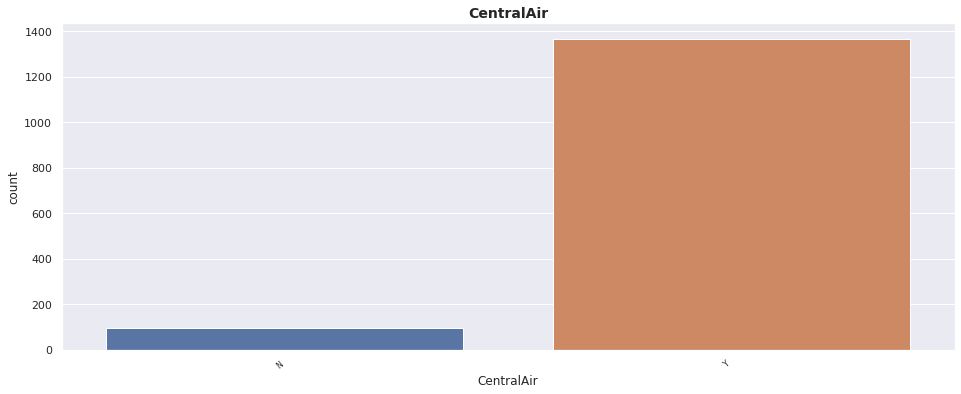

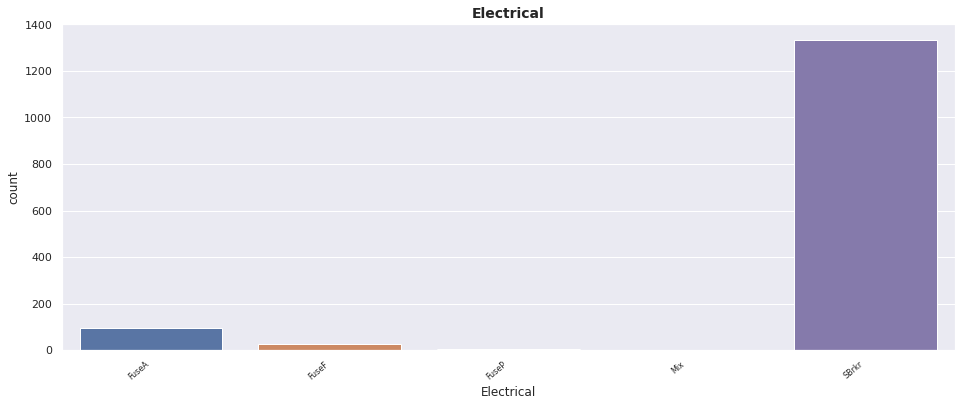

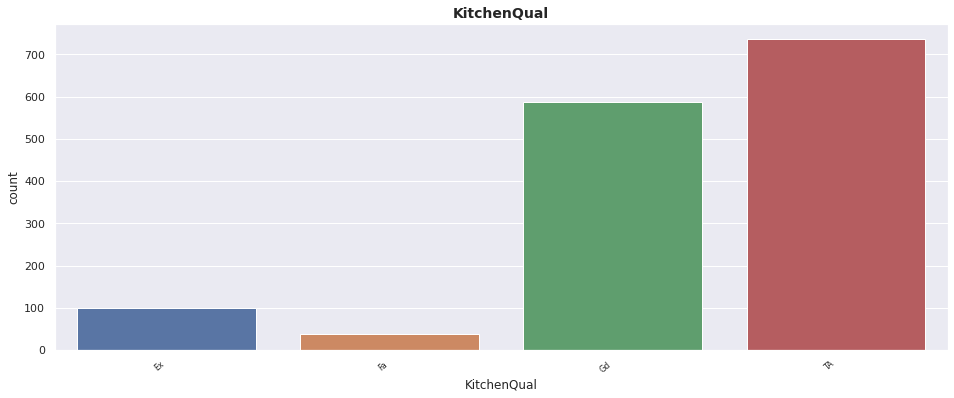

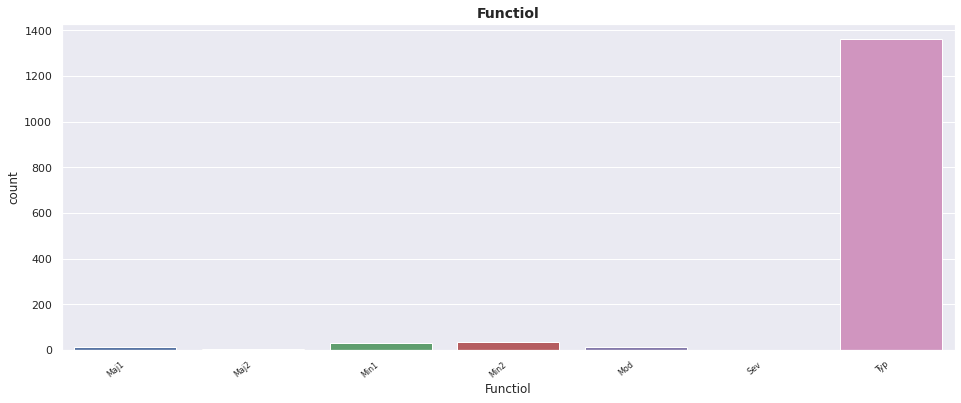

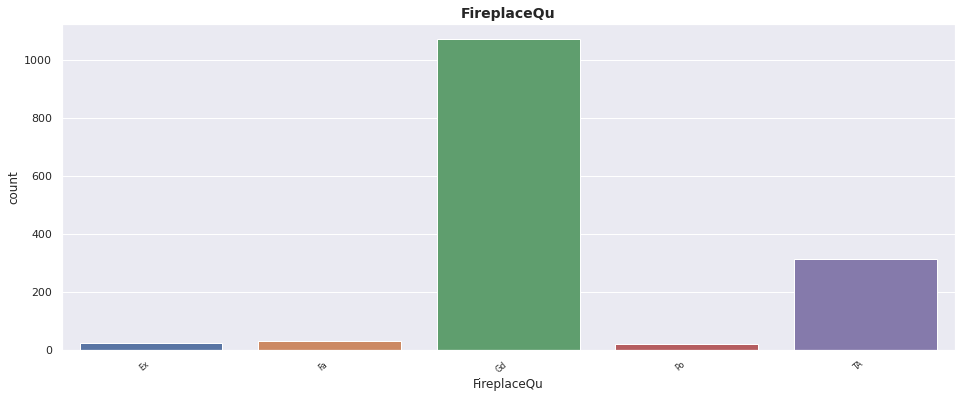

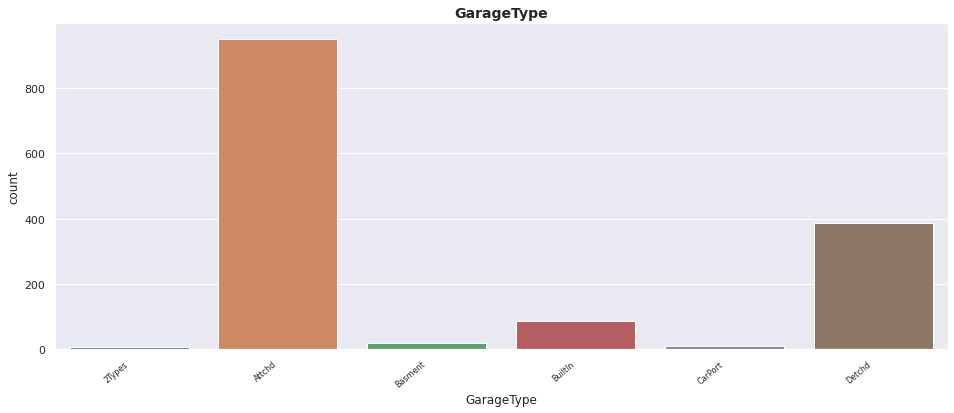

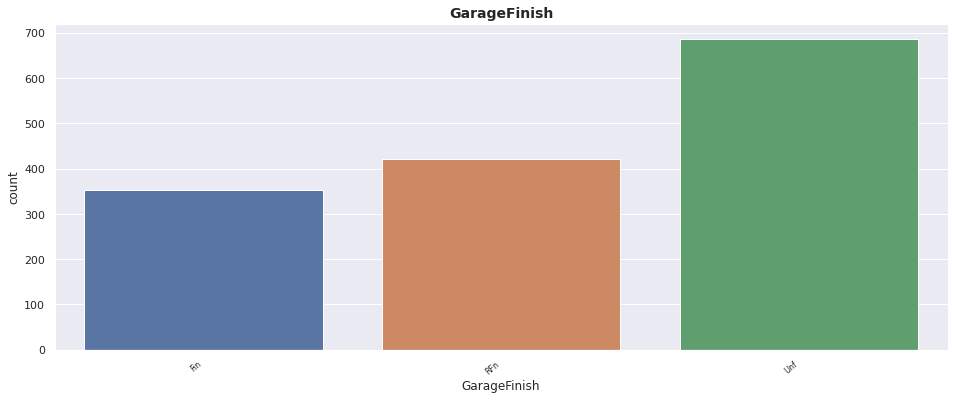

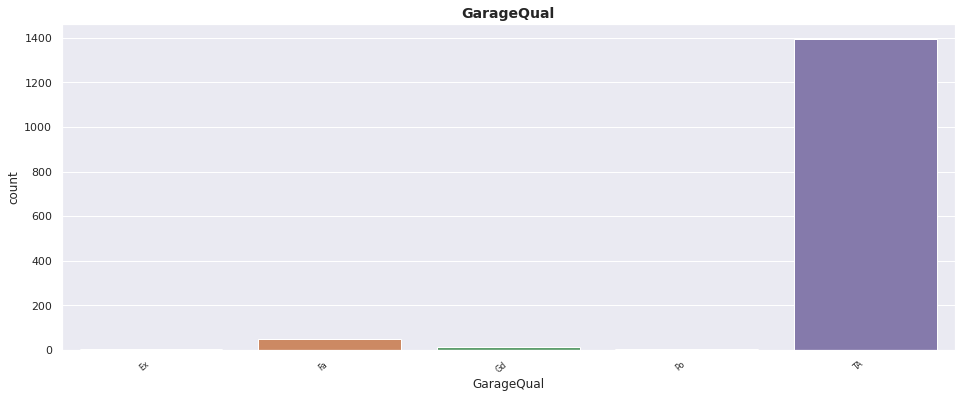

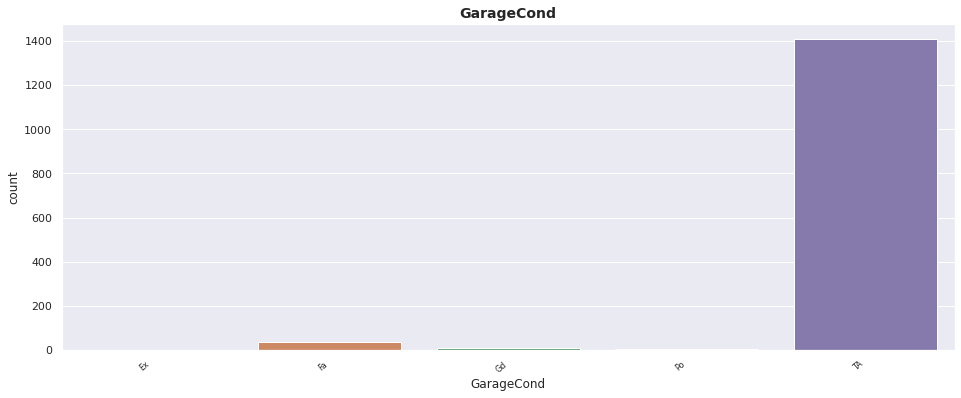

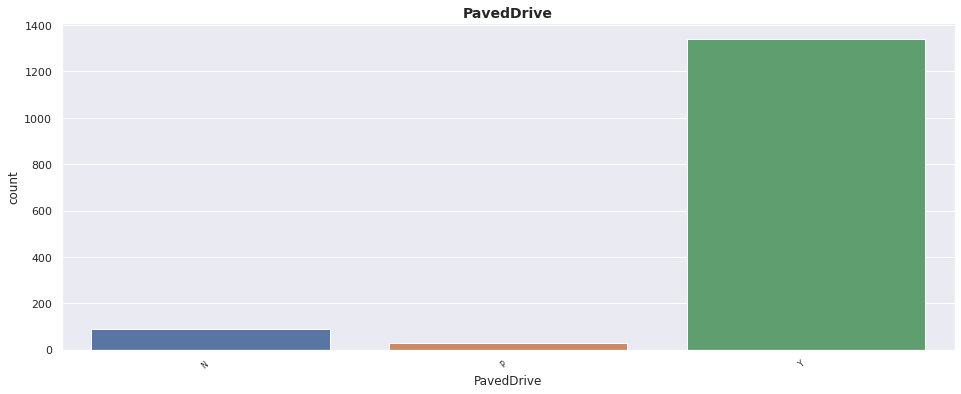

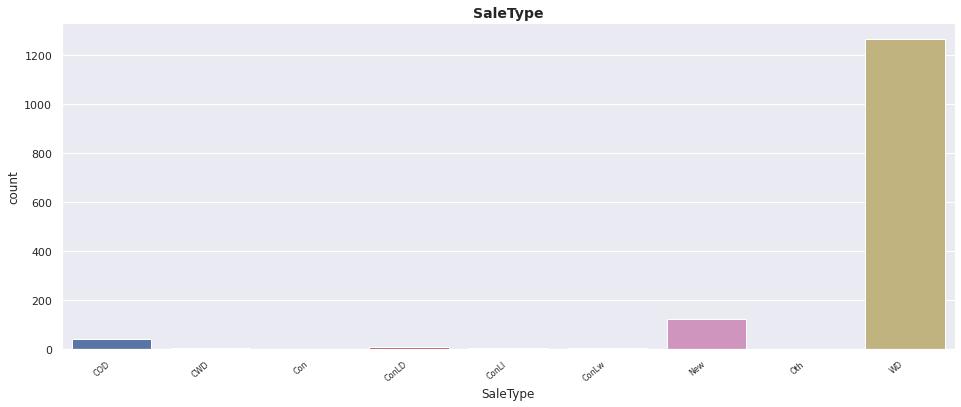

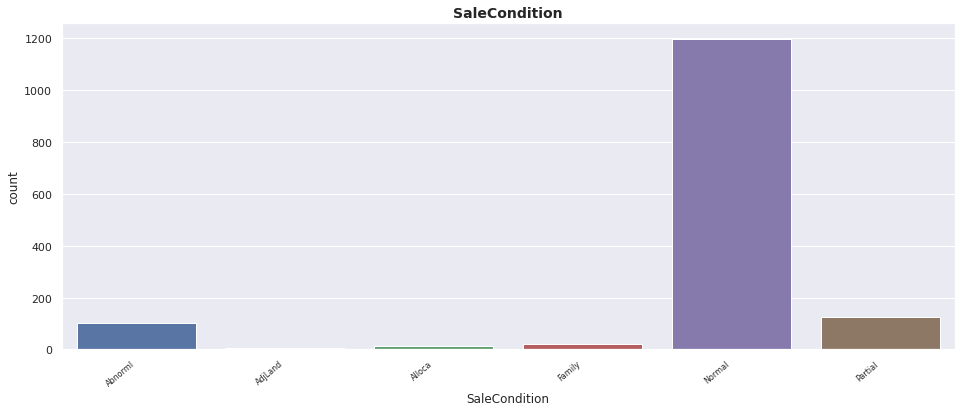

In [28]:
def histPlotLoop(df, columns):
    for col in columns:
        if (df[col].dtype == object) :
            i = dfCat[col].unique()
            i.sort()
            ## Plotting a histogram with the Categorical Data
            plt.figure(figsize=(16,6))
            ax = sns.countplot(x=col, data=df, order=i)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
            plt.title(col, fontsize=14, fontweight='bold')
            plt.show()
            
            
histPlotLoop(dfCat, dfCat.columns)

In [29]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [30]:
import category_encoders as ce

encoder = ce.ordinal.OrdinalEncoder(return_df = True)  
df_train = encoder.fit_transform(dfCat)

df_train.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,208500
1,2,1,1,1,1,1,2,1,2,2,...,1,2,1,1,1,1,1,1,1,181500
2,3,1,1,2,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,223500
3,4,1,1,2,1,1,3,1,3,1,...,1,1,2,2,1,1,1,1,2,140000
4,5,1,1,2,1,1,2,1,4,1,...,1,2,1,1,1,1,1,1,1,250000


In [31]:
dfCat = df_train


In [32]:
dfCat.corr()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
Id,1.000000,-0.011949,-0.008916,-0.024071,0.014769,0.013324,-0.038192,0.005847,-0.013078,-0.010735,...,0.006018,-0.024325,0.009743,-0.002604,-0.014586,0.000987,0.008921,-0.016932,-0.017712,-0.021917
MSZoning,-0.011949,1.000000,0.039678,-0.167918,-0.013396,-0.011167,-0.094747,-0.043444,-0.067889,-0.026021,...,-0.029668,-0.117721,0.099439,0.005704,0.039895,0.028618,0.117402,0.058948,0.068705,-0.116047
Street,-0.008916,0.039678,1.000000,0.010129,0.097236,-0.001682,0.004458,0.179360,0.053445,0.023914,...,-0.015465,-0.017230,0.135136,-0.010497,-0.012414,-0.010851,0.011248,0.021171,0.022919,-0.041036
LotShape,-0.024071,-0.167918,0.010129,1.000000,0.201047,0.026616,0.308073,0.144248,-0.013295,0.066612,...,-0.017841,0.102891,-0.045583,0.067334,-0.046539,-0.065380,-0.100666,0.001435,-0.004773,0.267759
LandContour,0.014769,-0.013396,0.097236,0.201047,1.000000,-0.007963,0.021107,0.507203,0.113336,-0.021478,...,0.016088,-0.053251,0.032066,0.055327,-0.030841,-0.022491,0.081031,-0.014537,0.062826,0.092009
Utilities,0.013324,-0.011167,-0.001682,0.026616,-0.007963,1.000000,0.062298,-0.005909,0.029258,-0.008311,...,-0.006303,-0.012962,0.114822,-0.034307,-0.005059,-0.004422,-0.007368,0.057455,0.019173,-0.014314
LotConfig,-0.038192,-0.094747,0.004458,0.308073,0.021107,0.062298,1.000000,0.033673,-0.055593,0.061695,...,0.008194,0.057436,-0.006936,0.029645,0.006178,0.034839,-0.065917,0.012120,-0.013638,0.109106
LandSlope,0.005847,-0.043444,0.179360,0.144248,0.507203,-0.005909,0.033673,1.000000,0.072891,-0.020333,...,0.097882,0.013180,0.063664,0.018310,-0.014761,-0.008288,0.018009,-0.056680,0.017187,0.051152
Neighborhood,-0.013078,-0.067889,0.053445,-0.013295,0.113336,0.029258,-0.055593,0.072891,1.000000,0.002747,...,0.077679,0.011046,0.088574,0.175353,-0.030853,0.006989,0.065998,0.008466,0.007101,-0.143621
Condition1,-0.010735,-0.026021,0.023914,0.066612,-0.021478,-0.008311,0.061695,-0.020333,0.002747,1.000000,...,-0.003683,-0.012094,0.021200,0.026413,0.006257,0.002639,0.034886,0.003128,-0.019800,-0.044820


In [33]:
dfCatHigh = dfCat.loc[:, dfCat.corr().abs()['SalePrice'] > 0.3]

# ADD Id Column Back to the DataFrame for merging later
dfCatHigh['Id'] = dfCat['Id']
# shift Id column to first position
first_column = dfCatHigh.pop('Id')
  
# insert column using insert(position,column_name,
dfCatHigh.insert(0, 'Id', first_column)

In [34]:
dfCatHigh.head()

,Id,Foundation,BsmtFinType1,HeatingQC,SalePrice
0,1,1,1,1,208500
1,2,2,2,1,181500
2,3,1,1,1,223500
3,4,3,2,2,140000
4,5,1,1,1,250000


<AxesSubplot: >

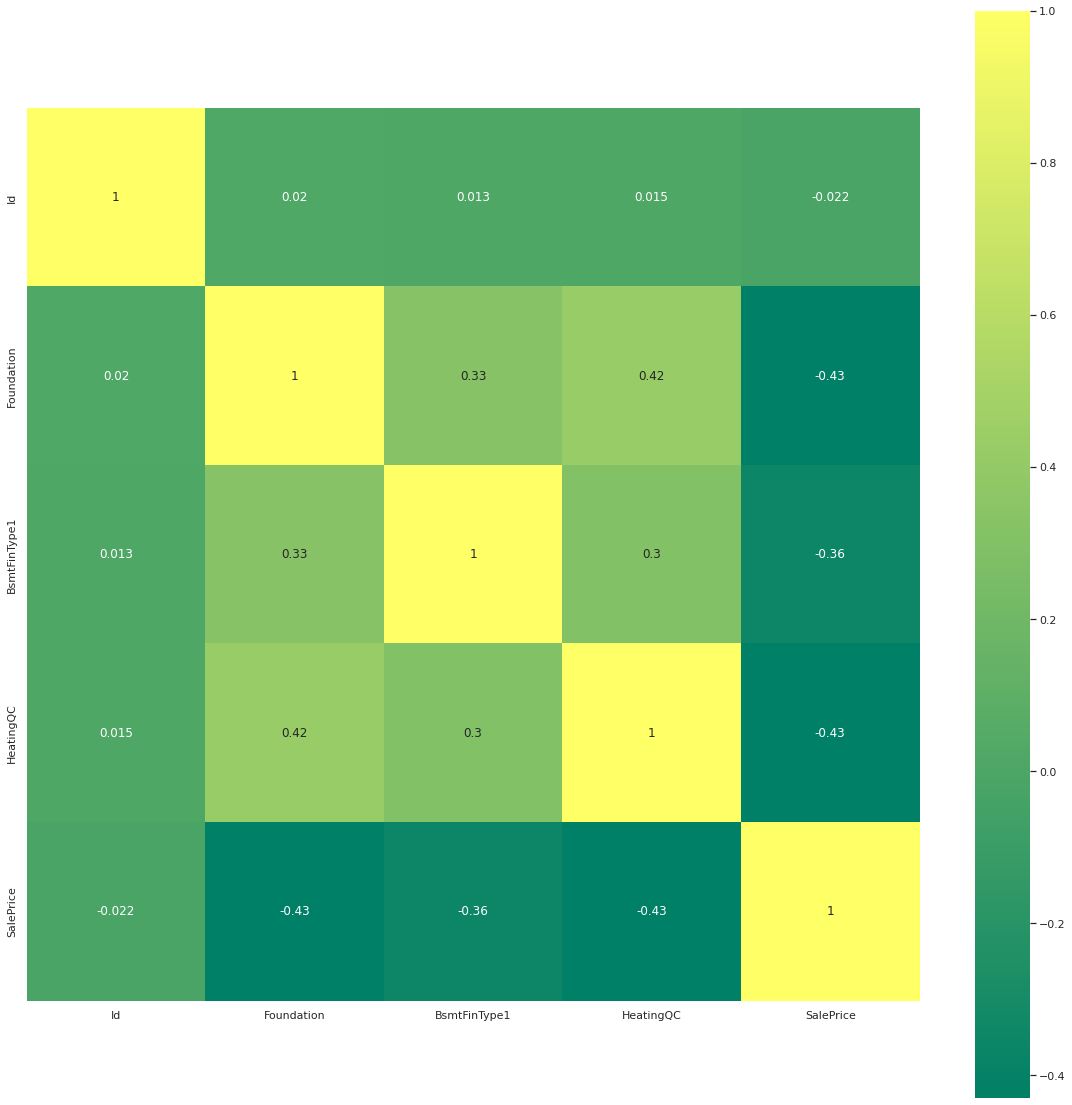

In [36]:
sns.set(rc={'figure.figsize':(20,20)})
color = plt.get_cmap('summer')   # default color
color.set_bad('lightblue')
sns.heatmap(data=dfCatHigh.corr(), square=True, annot=True, fmt='.2g',  cmap= color)

In [37]:
# Define a list of models that we want to review
models = ["Foundation", "BsmtFinType1", "HeatingQC"]

# Create a copy of the data with only the top 8 manufacturers
dfChi = dfCat[models].copy()
dfChi

,Foundation,BsmtFinType1,HeatingQC
0,1,1,1
1,2,2,1
2,1,1,1
3,3,2,2
4,1,1,1
5,4,1,1
6,1,1,1
7,2,2,1
8,3,3,2
9,3,1,1


Id              0.000000
Foundation      1.686723
BsmtFinType1    0.518622
HeatingQC       0.540458
SalePrice       1.882876
dtype: float64


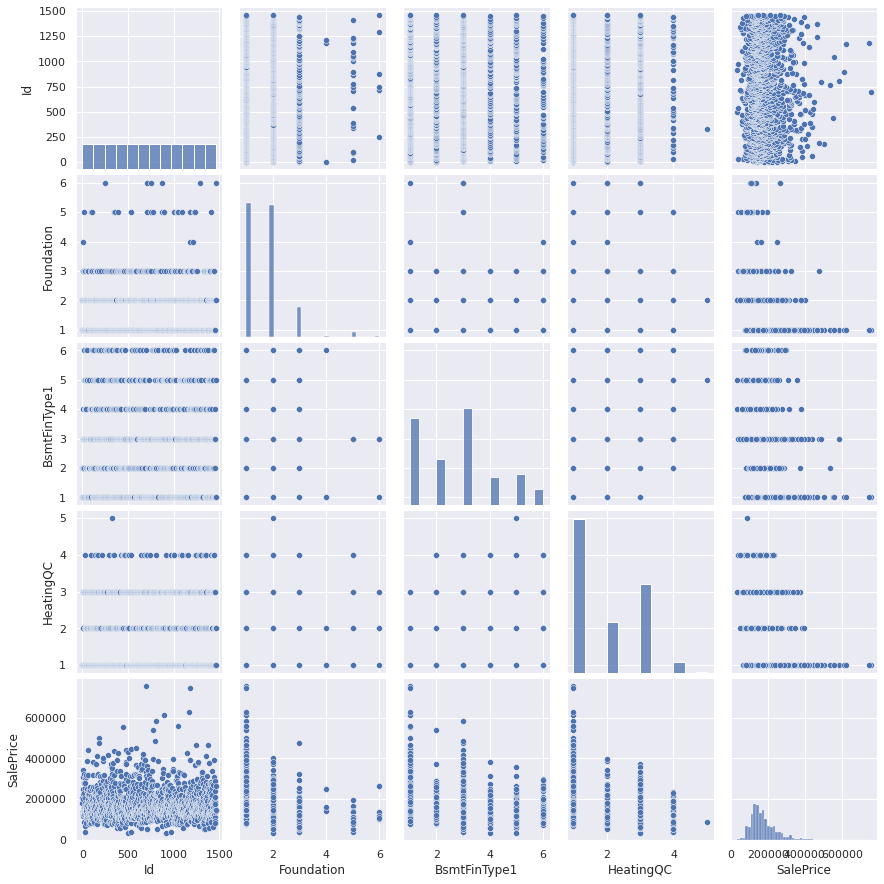

In [38]:
skewValue = dfCatHigh.skew(axis=0, numeric_only=True)
print(skewValue)
sns.pairplot(dfCatHigh)

In [39]:
df_merge = pd.merge(df2Num, dfCatHigh, how='outer', on = 'Id')
df_merge.head()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice_x,Foundation,BsmtFinType1,HeatingQC,SalePrice_y
0,1,65.0,7,2003,2003,196.0,706,856,856,854,...,2003.0,2,548,0,61,208500,1,1,1,208500
1,2,80.0,6,1976,1976,0.0,978,1262,1262,0,...,1976.0,2,460,298,0,181500,2,2,1,181500
2,3,68.0,7,2001,2002,162.0,486,920,920,866,...,2001.0,2,608,0,42,223500,1,1,1,223500
3,4,60.0,7,1915,1970,0.0,216,756,961,756,...,1998.0,3,642,0,35,140000,3,2,2,140000
4,5,84.0,8,2000,2000,350.0,655,1145,1145,1053,...,2000.0,3,836,192,84,250000,1,1,1,250000


In [40]:
df_merge.shape

(1460, 24)

In [41]:
df_merge.corr()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice_x,Foundation,BsmtFinType1,HeatingQC,SalePrice_y
Id,1.000000,-0.010601,-0.029109,-0.012084,-0.021998,-0.050298,-0.013375,-0.023009,0.005143,0.005193,...,0.000072,0.013672,0.013392,-0.033566,-0.011482,-0.027439,0.020023,0.012783,0.015001,-0.021917
LotFrontage,-0.010601,1.000000,0.251643,0.123545,0.088866,0.193458,0.169105,0.331545,0.413707,0.078462,...,0.070250,0.287404,0.329622,0.094800,0.158282,0.355355,-0.093245,-0.073959,-0.098509,0.351799
OverallQual,-0.029109,0.251643,1.000000,0.575160,0.550829,0.412676,0.229718,0.541432,0.473935,0.294860,...,0.547766,0.609159,0.568185,0.246423,0.358426,0.817680,-0.477282,-0.375150,-0.457410,0.791965
YearBuilt,-0.012084,0.123545,0.575160,1.000000,0.594909,0.316099,0.252814,0.410450,0.288419,0.011488,...,0.826482,0.546705,0.487446,0.238377,0.262130,0.570327,-0.648157,-0.448995,-0.449252,0.524172
YearRemodAdd,-0.021998,0.088866,0.550829,0.594909,1.000000,0.179618,0.126337,0.301581,0.246662,0.140013,...,0.642277,0.425546,0.377335,0.222702,0.280916,0.552061,-0.477886,-0.399609,-0.550017,0.507101
MasVnrArea,-0.050298,0.193458,0.412676,0.316099,0.179618,1.000000,0.248893,0.350168,0.332780,0.174596,...,0.252691,0.367136,0.366437,0.166810,0.149523,0.443869,-0.211636,-0.173801,-0.159639,0.477493
BsmtFinSF1,-0.013375,0.169105,0.229718,0.252814,0.126337,0.248893,1.000000,0.467348,0.395381,-0.157621,...,0.151881,0.231241,0.278344,0.209158,0.088825,0.387583,-0.204704,-0.328471,-0.082747,0.400319
TotalBsmtSF,-0.023009,0.331545,0.541432,0.410450,0.301581,0.350168,0.467348,1.000000,0.807158,-0.206180,...,0.335605,0.461365,0.485658,0.241778,0.249657,0.645250,-0.420562,-0.222359,-0.274791,0.636999
1stFlrSF,0.005143,0.413707,0.473935,0.288419,0.246662,0.332780,0.395381,0.807158,1.000000,-0.227040,...,0.237277,0.459572,0.487425,0.238082,0.204385,0.621874,-0.189160,-0.181097,-0.195179,0.620740
2ndFlrSF,0.005193,0.078462,0.294860,0.011488,0.140013,0.174596,-0.157621,-0.206180,-0.227040,1.000000,...,0.070616,0.183574,0.141130,0.089820,0.219093,0.316508,-0.071301,-0.019549,-0.141724,0.316547


<AxesSubplot: >

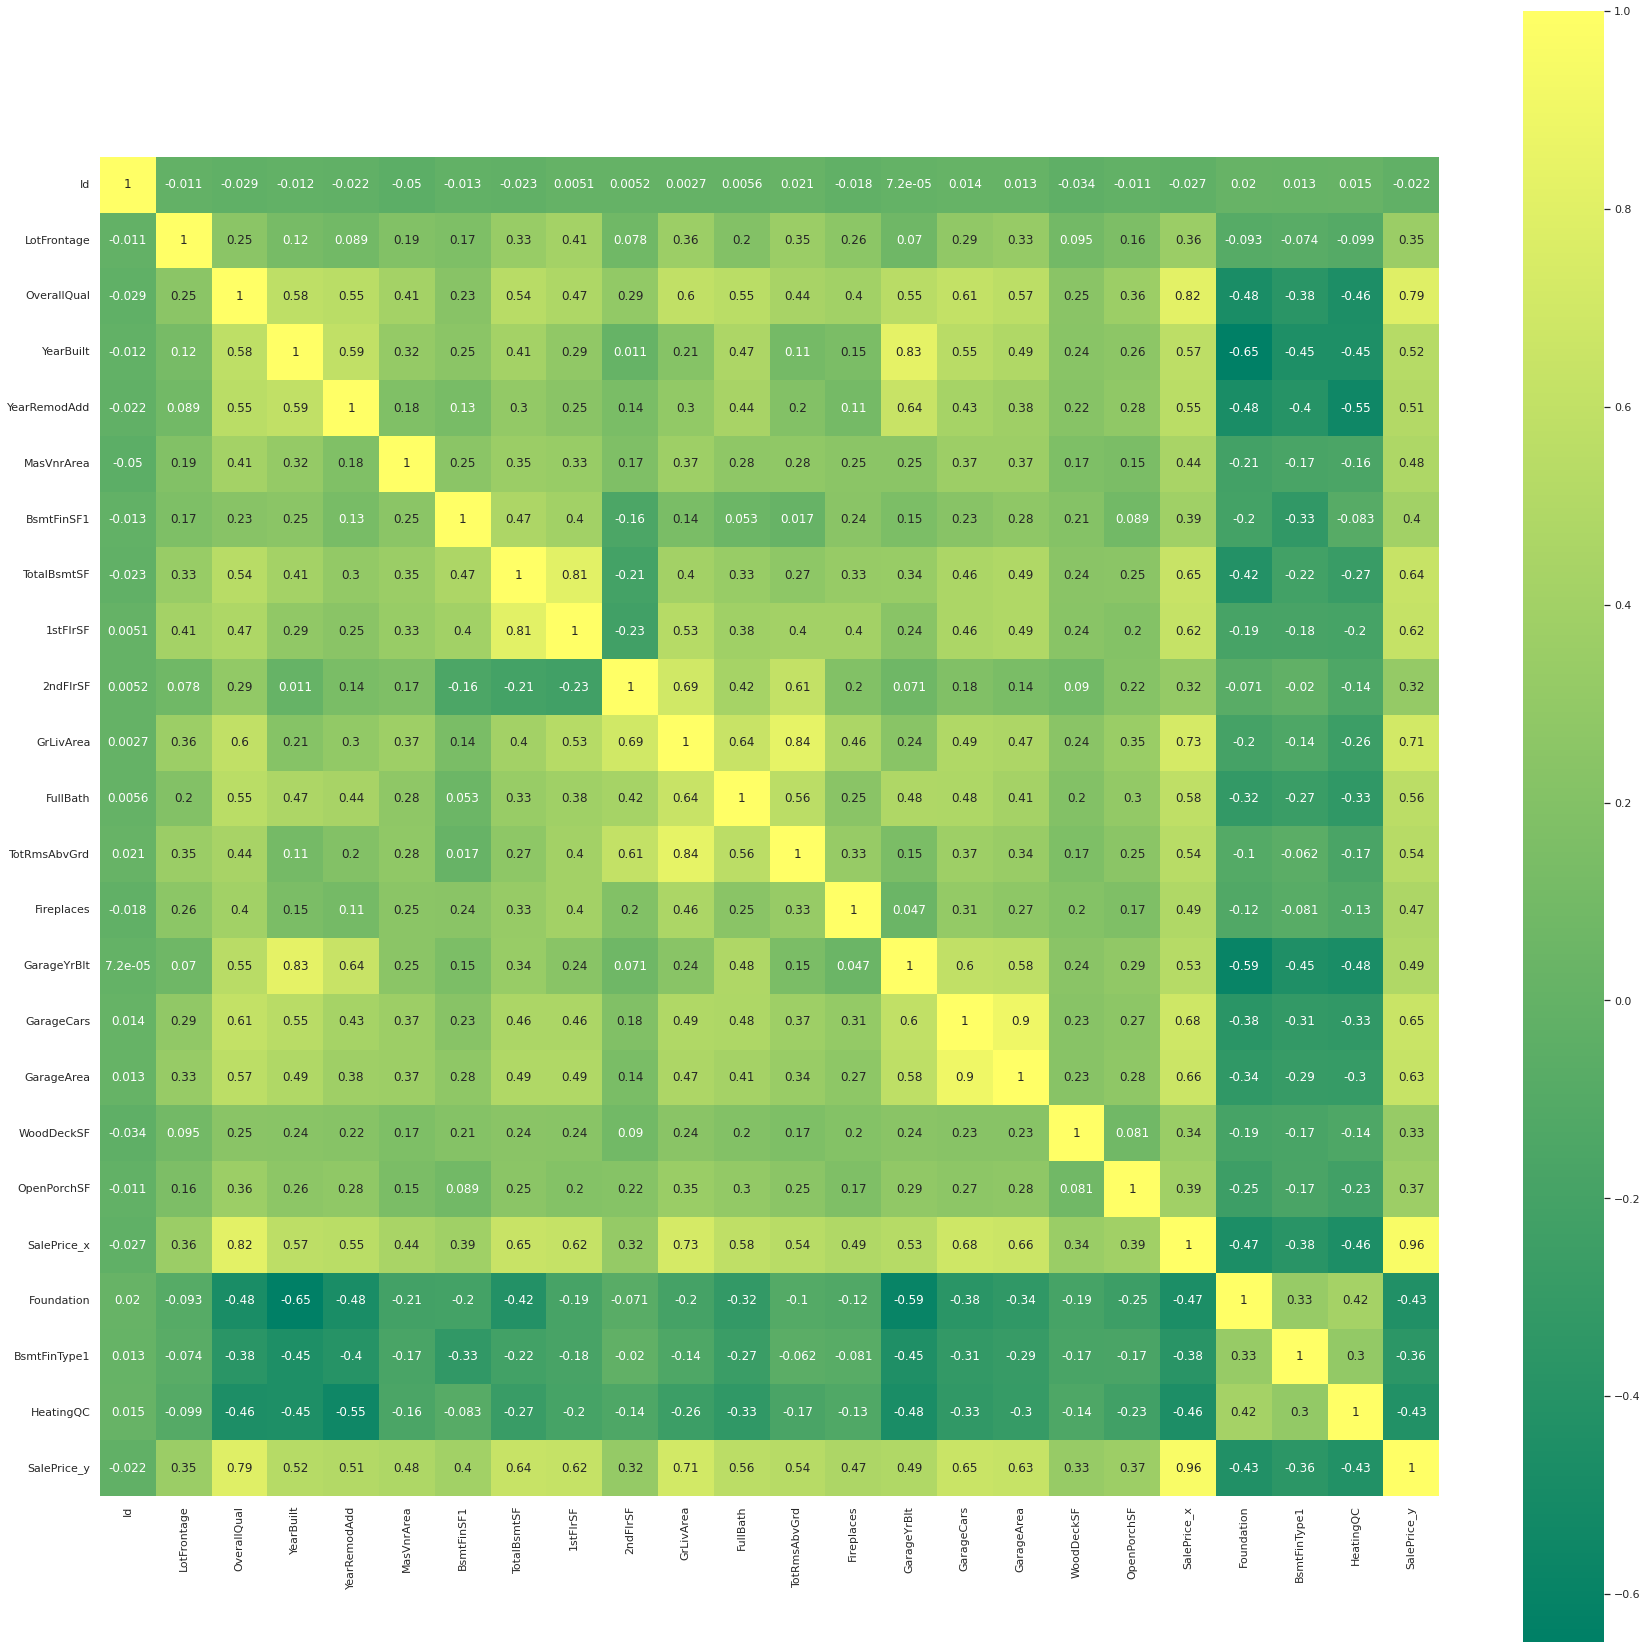

In [42]:
sns.set(rc={'figure.figsize':(30,30)})
color = plt.get_cmap('summer')   # default color
color.set_bad('lightblue')
sns.heatmap(data=df_merge.corr(), square=True, annot=True, fmt='.2g',  cmap= color)

In [43]:
df_final = df_merge
df_final.head()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice_x,Foundation,BsmtFinType1,HeatingQC,SalePrice_y
0,1,65.0,7,2003,2003,196.0,706,856,856,854,...,2003.0,2,548,0,61,208500,1,1,1,208500
1,2,80.0,6,1976,1976,0.0,978,1262,1262,0,...,1976.0,2,460,298,0,181500,2,2,1,181500
2,3,68.0,7,2001,2002,162.0,486,920,920,866,...,2001.0,2,608,0,42,223500,1,1,1,223500
3,4,60.0,7,1915,1970,0.0,216,756,961,756,...,1998.0,3,642,0,35,140000,3,2,2,140000
4,5,84.0,8,2000,2000,350.0,655,1145,1145,1053,...,2000.0,3,836,192,84,250000,1,1,1,250000
